In [1]:
suppressPackageStartupMessages(library(DESeq2))
suppressPackageStartupMessages(library(useful)) 
suppressPackageStartupMessages(library(ggplot2)) 
suppressPackageStartupMessages(library(dplyr)) 
suppressPackageStartupMessages(library(limma)) 
suppressPackageStartupMessages(library(EnhancedVolcano)) 
suppressPackageStartupMessages(library(biomaRt)) 
suppressPackageStartupMessages(library(gridExtra)) 
suppressPackageStartupMessages(library(repr)) 

Possible Ensembl SSL connectivity problems detected.
Please see the 'Connection Troubleshooting' section of the biomaRt vignette
vignette('accessing_ensembl', package = 'biomaRt')Error in curl::curl_fetch_memory(url, handle = handle) : 
  SSL certificate problem: certificate has expired




In [2]:
data1 <- read.csv("bulk/iGlut_pre_merged_symbols.tsv",sep="\t",header=T,quote="",row.names=1)
data1 <- data1[,order(colnames(data1))]

meta1 <- read.csv("bulk/prepat_sample_meta.tsv",sep="\t",header=T,row.names=1,quote="")
row.names(meta1) <- paste0("iGlut_pre_",meta1$Sample)
meta1$TF <- 'Glut'
dim(meta1)

meta1 <- meta1[row.names(meta1)%in%colnames(data1),]
data1 <- data1[,row.names(meta1)]

dim(data1)
corner(data1) 


[1] 96 16

[1] 36595    96

iGlut_pre_1 iGlut_pre_2 iGlut_pre_3 iGlut_pre_4 iGlut_pre_5
A1BG     16          14          5           10          13         
A1BG-AS1  4          10          5            9           0         
A1CF      0           0          0            0           0         
A2M       6           2          8            2           0         
A2M-AS1   6           0          0            2           2

In [3]:
data2 <- read.csv("bulk/iGABA_pre_merged_symbols.tsv",sep="\t",header=T,quote="",row.names=1)
data2 <- data2[,order(colnames(data2))]

meta2 <- read.csv("bulk/prepat_sample_meta.tsv",sep="\t",header=T,row.names=1,quote="")
row.names(meta2) <- paste0("iGABA_pre_",meta2$Sample)
meta2$TF <- 'GABA'
dim(meta2)

meta2 <- meta2[row.names(meta2)%in%colnames(data2),]
data2 <- data2[,row.names(meta2)]

dim(data2)
corner(data2)

[1] 96 16

[1] 61578    96

iGABA_pre_1 iGABA_pre_2 iGABA_pre_3 iGABA_pre_4 iGABA_pre_5
5S_rRNA   0           1           0           0           0          
5_8S_rRNA 0           0           0           0           0          
7SK       1           0           3           1           0          
A1BG      0           0           2           0           1          
A1BG-AS1  0           0           0           0           0

In [4]:
shared_genes <- intersect(row.names(data1),row.names(data2))

In [5]:
data1 <- data1[shared_genes,]
data2 <- data2[shared_genes,]

In [6]:
data <- cbind(data1,data2)

In [7]:
meta <- rbind(meta1,meta2)

In [8]:
meta$condition <- paste0(meta$AP_axis,"_",meta$DV_axis,'_',meta$TF)

In [9]:
dim(data)

[1] 36030   192

In [10]:
table(meta$AP_axis)


     CHIR_2 CHIR_2_FGF8        FGF8        RA_2        RA_3   RA_3_FGF8 
         24          24           8           8           8           8 
       RA_4       XAV_1       XAV_3  XAV_3_FGF8        ctrl 
          8          24          24          24          32 

In [70]:
write.table(meta,"bulk/patterned_progenitors_meta.tsv",sep="\t",quote=F)

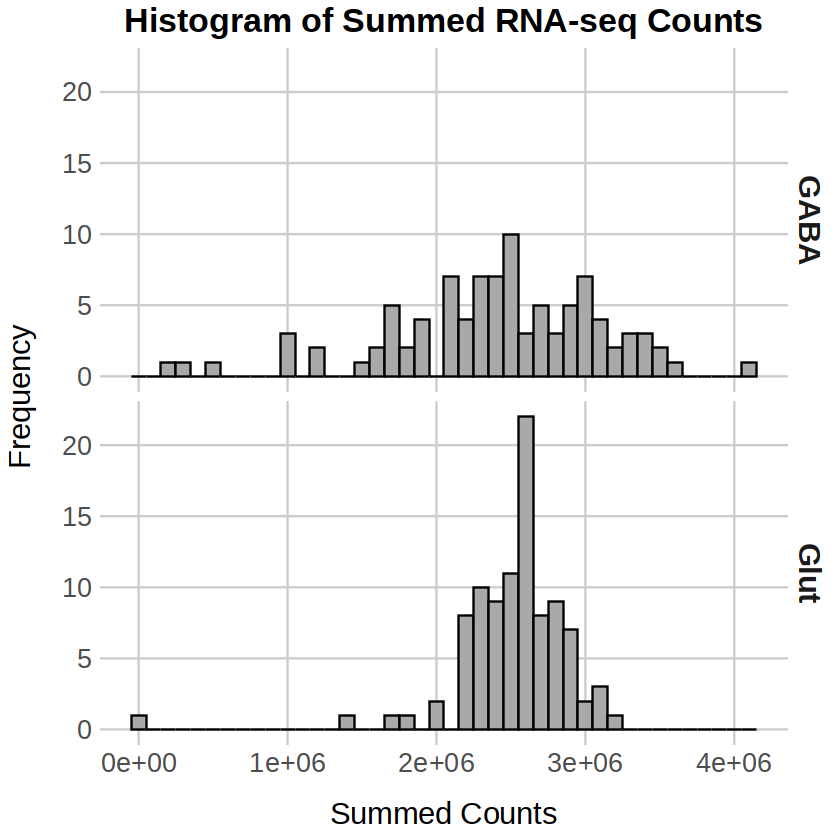

In [12]:
# Load necessary libraries
library(ggplot2)

# Create the plot and adjust aesthetics
p <- ggplot(meta, aes(x = counts)) +
  geom_histogram(binwidth = 100000, fill = 'darkgrey', color = 'black') +
  ggtitle('Histogram of Summed RNA-seq Counts') +
  xlab('Summed Counts') +
  ylab('Frequency') +
  facet_grid(TF ~ .) +
  theme_minimal() +  # Clean theme
  theme(
    plot.title = element_text(size = 20, hjust = 0.5, face = "bold"),  # Larger title
    axis.title.x = element_text(size = 18, margin = margin(t = 15)),   # Larger x-axis label
    axis.title.y = element_text(size = 18, margin = margin(r = 15)),   # Larger y-axis label
    axis.text.x = element_text(size = 16),                            # Larger x-axis tick labels
    axis.text.y = element_text(size = 16),                            # Larger y-axis tick labels
    strip.text.y = element_text(size = 18, face = "bold"),            # Larger facet label text
    panel.grid.major = element_line(color = "gray80"),                # Lighter major gridlines
    panel.grid.minor = element_blank()                                # Remove minor gridlines
  )

# Export the plot to a PDF with increased size for clarity in publication
ggsave("prepat_plots/Summed_RNAseq_Histogram.pdf", plot = p, width = 10, height = 8)

# Print the plot in RStudio for viewing
print(p)


In [13]:
# Define the minimum count threshold
min_count_threshold <- 900000  # Replace with your desired threshold

# Filter out samples (columns) with fewer than the minimum threshold counts
filtered_data <- data[, colSums(data) >= min_count_threshold]
filtered_meta <- meta[colSums(data) >= min_count_threshold,]


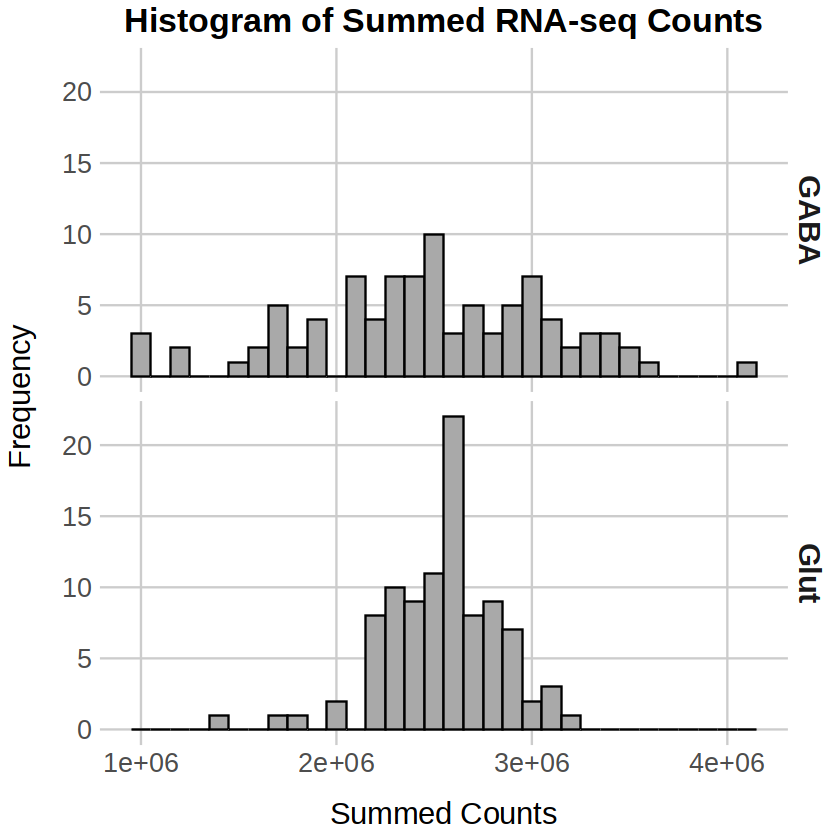

In [14]:
# Load necessary libraries
library(ggplot2)

# Create the plot and adjust aesthetics
p <- ggplot(filtered_meta, aes(x = counts)) +
  geom_histogram(binwidth = 100000, fill = 'darkgrey', color = 'black') +
  ggtitle('Histogram of Summed RNA-seq Counts') +
  xlab('Summed Counts') +
  ylab('Frequency') +
  facet_grid(TF ~ .) +
  theme_minimal() +  # Clean theme
  theme(
    plot.title = element_text(size = 20, hjust = 0.5, face = "bold"),  # Larger title
    axis.title.x = element_text(size = 18, margin = margin(t = 15)),   # Larger x-axis label
    axis.title.y = element_text(size = 18, margin = margin(r = 15)),   # Larger y-axis label
    axis.text.x = element_text(size = 16),                            # Larger x-axis tick labels
    axis.text.y = element_text(size = 16),                            # Larger y-axis tick labels
    strip.text.y = element_text(size = 18, face = "bold"),            # Larger facet label text
    panel.grid.major = element_line(color = "gray80"),                # Lighter major gridlines
    panel.grid.minor = element_blank()                                # Remove minor gridlines
  )

# Export the plot to a PDF with increased size for clarity in publication
ggsave("prepat_plots/Summed_RNAseq_Histogram_afterfilter.pdf", plot = p, width = 10, height = 8)

# Print the plot in RStudio for viewing
print(p)


In [15]:
setdiff(row.names(meta),row.names(filtered_meta))

[1] "iGlut_pre_72" "iGABA_pre_23" "iGABA_pre_24" "iGABA_pre_33"

In [16]:
dim(filtered_meta)

[1] 188  18

In [17]:
dim(filtered_data)

[1] 36030   188

In [18]:
deseq2.colData <- data.frame(row.names=colnames(filtered_data))
#deseq2.colData$pattern <- 'pre'


deseq2.colData <- filtered_meta
deseq2.colData['sums'] <- colSums(filtered_data)

In [19]:
corner(deseq2.colData)

Sample AP_axis    DV_axis Basal_media M_XAV
iGlut_pre_1 1      XAV_3      BMP4_3  NIM         5.0  
iGlut_pre_2 2      XAV_3_FGF8 BMP4_3  NIM         5.0  
iGlut_pre_3 3      XAV_1      BMP4_3  NIM         0.2  
iGlut_pre_4 4      ctrl       BMP4_3  NIM         0.0  
iGlut_pre_5 5      XAV_3      BMP4_1  NIM         5.0

In [20]:
#colData$group <- factor(colData$group)

columns_to_factor <- c("M_NIM","M_N2B27_2Si","M_N2B27_SB_CHIR","Basal_media",'TF')
deseq2.colData <- deseq2.colData %>%
  mutate_at(vars(all_of(columns_to_factor)), factor)

numeric_columns_to_scale <- c("M_XAV","M_CHIR","M_RA","M_FGF8","M_BMP4","M_SHH")
# Scale the specified numeric columns
deseq2.colData <- deseq2.colData %>%
  mutate_at(vars(all_of(numeric_columns_to_scale)), ~ scale(log(. + 1)))



In [21]:
corner(deseq2.colData)

Sample AP_axis    DV_axis Basal_media M_XAV     
iGlut_pre_1 1      XAV_3      BMP4_3  NIM          1.7471150
iGlut_pre_2 2      XAV_3_FGF8 BMP4_3  NIM          1.7471150
iGlut_pre_3 3      XAV_1      BMP4_3  NIM         -0.3654156
iGlut_pre_4 4      ctrl       BMP4_3  NIM         -0.6047289
iGlut_pre_5 5      XAV_3      BMP4_1  NIM          1.7471150

In [22]:
table(meta$M_RA)


   0   10  100 1000 
 160    8   16    8 

In [23]:
table(deseq2.colData$M_RA)


-0.422551174958838  0.861967696954439   2.04970416800219   3.27837187873854 
               156                  8                 16                  8 

In [24]:
total <- filtered_data
rownames(deseq2.colData) <- colnames(total)
dds <- DESeqDataSetFromMatrix(countData = total, colData = deseq2.colData,design = ~ TF+M_RA+M_XAV+M_CHIR+M_FGF8+M_BMP4+M_SHH+Basal_media)

#dds <- DESeqDataSetFromMatrix(countData = total, colData = deseq2.colData,design = ~ M_RA)

In [25]:
colnames(deseq2.colData)

[1] "Sample"          "AP_axis"         "DV_axis"         "Basal_media"    
 [5] "M_XAV"           "M_CHIR"          "M_RA"            "M_FGF8"         
 [9] "M_BMP4"          "M_SHH"           "M_PM"            "M_CycA"         
[13] "M_NIM"           "M_N2B27_2Si"     "M_N2B27_SB_CHIR" "TF"             
[17] "condition"       "counts"          "sums"

In [26]:
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep,]

# Run Analysis
dds <- DESeq(dds)
res <- results(dds)
res <- res[order(rownames(res)), ]

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [27]:
table(mcols(dds)$betaConv)


 TRUE 
26075 

In [28]:
#save median normalised counts
normalized_counts <- counts(dds, normalized=TRUE)
#write.table(normalized_counts, file="bulk/DESEQ2_norm_counts_stranded.tsv", sep="\t", quote=F, col.names=NA) 

In [44]:
vsd <- vst(dds, blind=FALSE)
vsd_orig <- vsd
#rld <- rlog(dds, blind=FALSE) 

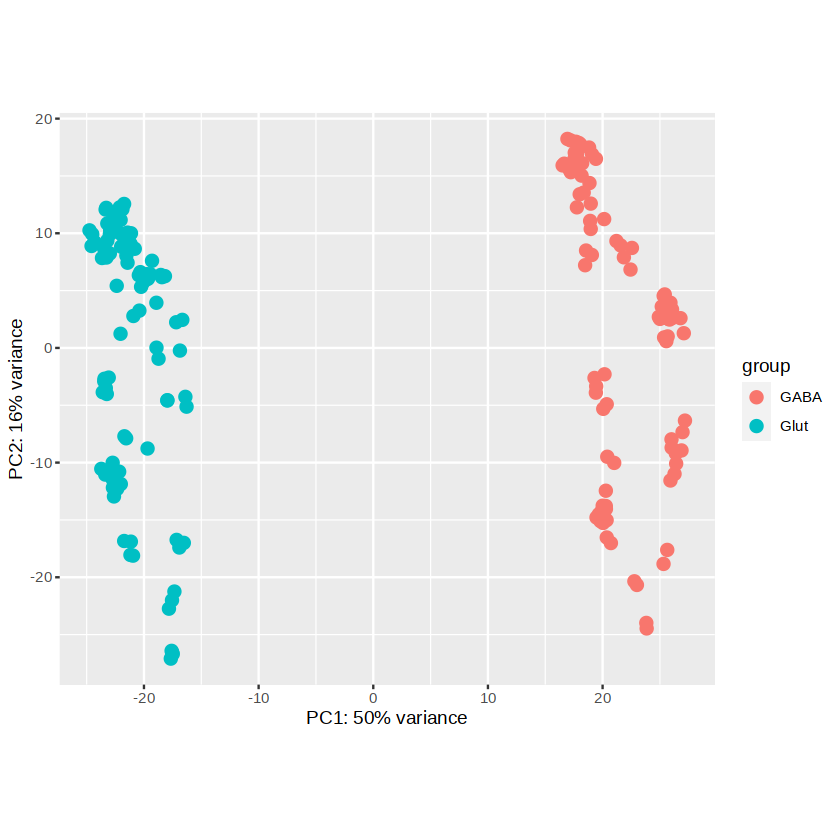

In [45]:
plotPCA(vsd,intgroup=c('TF'))

In [46]:
mat <- assay(vsd)
mm <- model.matrix(~M_RA+M_XAV+M_CHIR+M_FGF8+M_BMP4+M_SHH+Basal_media, colData(vsd))
mat <- limma::removeBatchEffect(mat, batch=vsd$TF, design=mm)
assay(vsd) <- mat

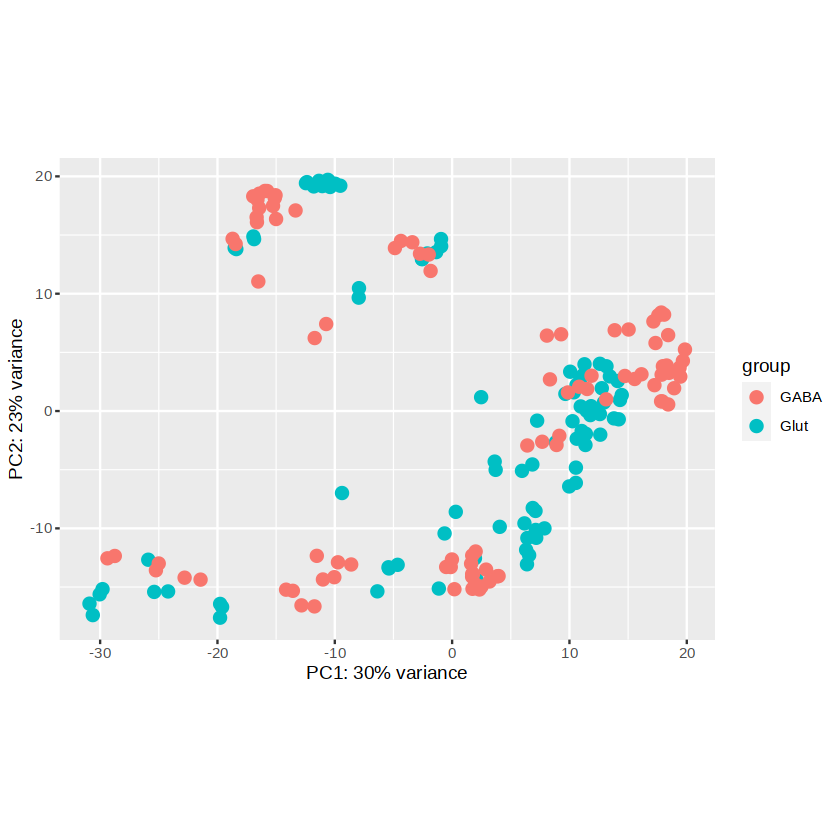

In [47]:
plotPCA(vsd,intgroup=c('TF'))

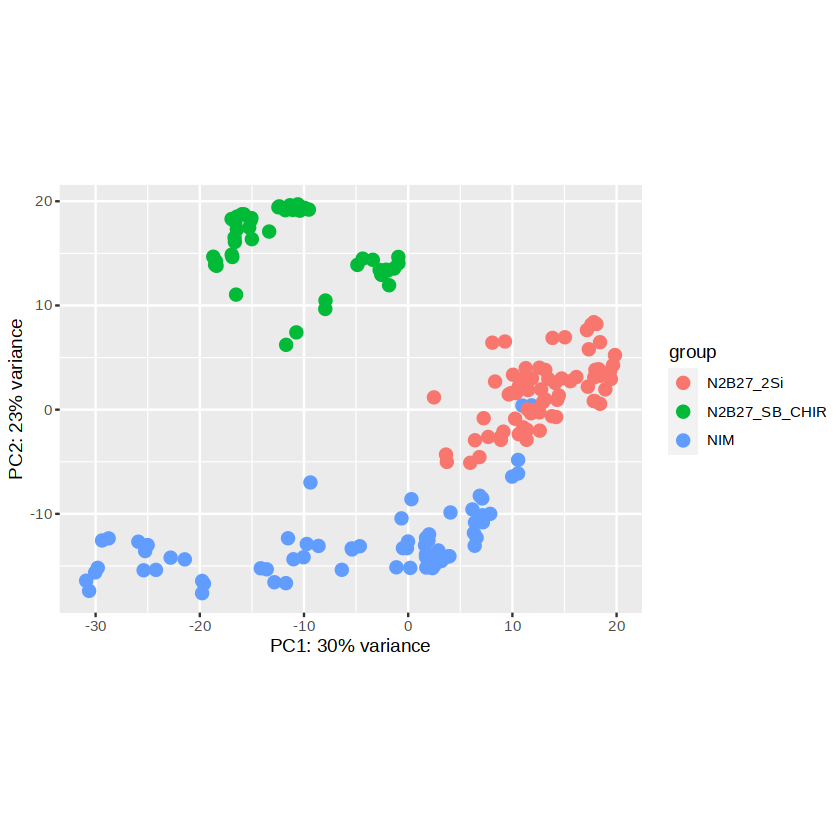

In [48]:
plotPCA(vsd,intgroup=c('Basal_media'))

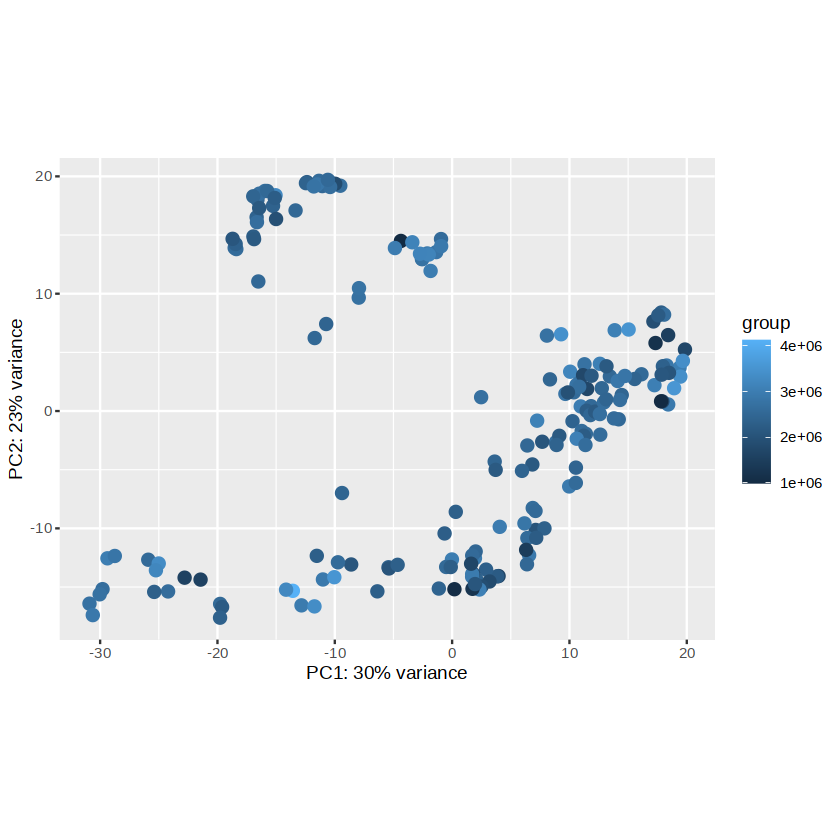

In [49]:
pca_df <- vsd
ntop <- 1000
plotPCA(object = pca_df,intgroup=c('sums'))

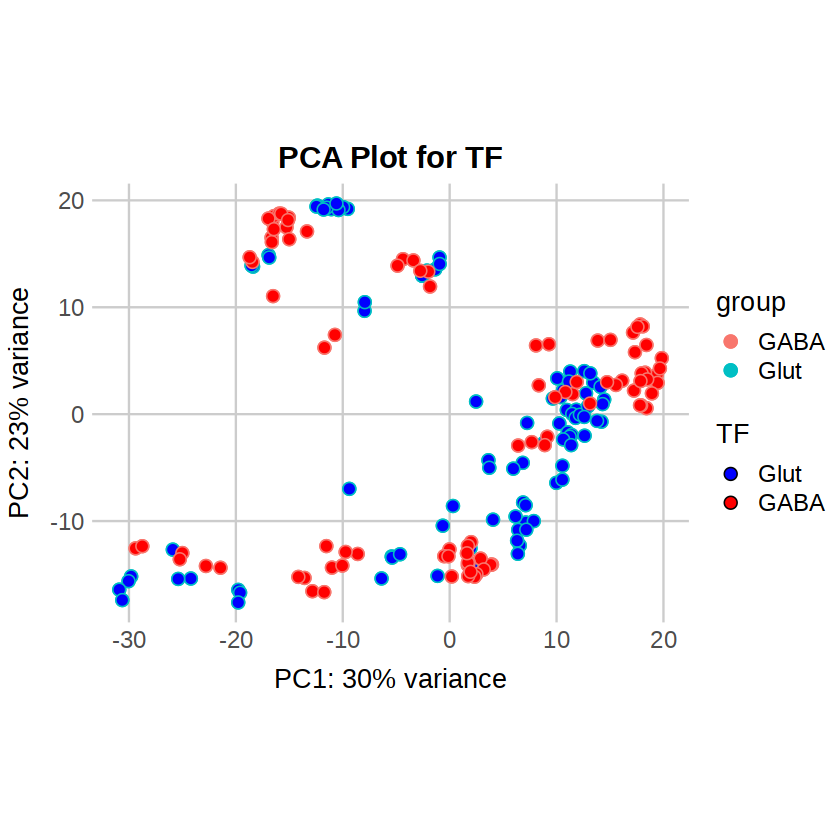

In [51]:
# Load necessary libraries
library(ggplot2)
library(DESeq2)  # Assuming you're using DESeq2 for vsd_samplecorr

# Step 1: Define sample to ID mapping and two color mappings
sample2ID <- c(
  '1' = 'p1_D4',
  '2' = 'p1_D8',
  '3' = 'p1_D10',
  '4' = 'p1_B4',
  '5' = 'p1_B8',
  '6' = 'p1_B10',
  '7' = 'p3_C2',
  '8' = 'p3_F2',
  '9' = 'p3_D1',
  '10' = 'p3_F4',
  '11' = 'p3_G1',
  '12' = 'p3_G10'
)

TF_colors <- c(    
    Glut = 'blue',
    GABA = 'red')

BM_colors <- c(  
    N2B27_SB_CHIR = '#102A4D',
    N2B27_2Si = '#8DC7DD',
    NIM = '#4E835E',
    mTeSR = '#CBCCCC' 
)


# Step 2: Map 'sample' numbers to their corresponding IDs
#vsd$TF <- factor(sample2ID[as.character(vsd$TF)], levels = names(TF_colors))

# Create the PCA plot for 'sample' with custom fill and outline colors
p_sample <- plotPCA(object = vsd, intgroup = c('TF')) +
  ggtitle('PCA Plot for TF') +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
    axis.title.x = element_text(size = 16, margin = margin(t = 10)),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_blank()
  ) +
  geom_point(aes(color = TF, fill = TF), size = 3, shape = 21, stroke = 0.5) +
  scale_fill_manual(values = TF_colors)  # Apply custom fill colors

# Display the 'sample' plot in the notebook
print(p_sample)

# Save the 'sample' plot as a PDF file
ggsave("prepat_plots/PCA_Plot_TF_color.pdf", plot = p_sample, width = 8, height = 6)


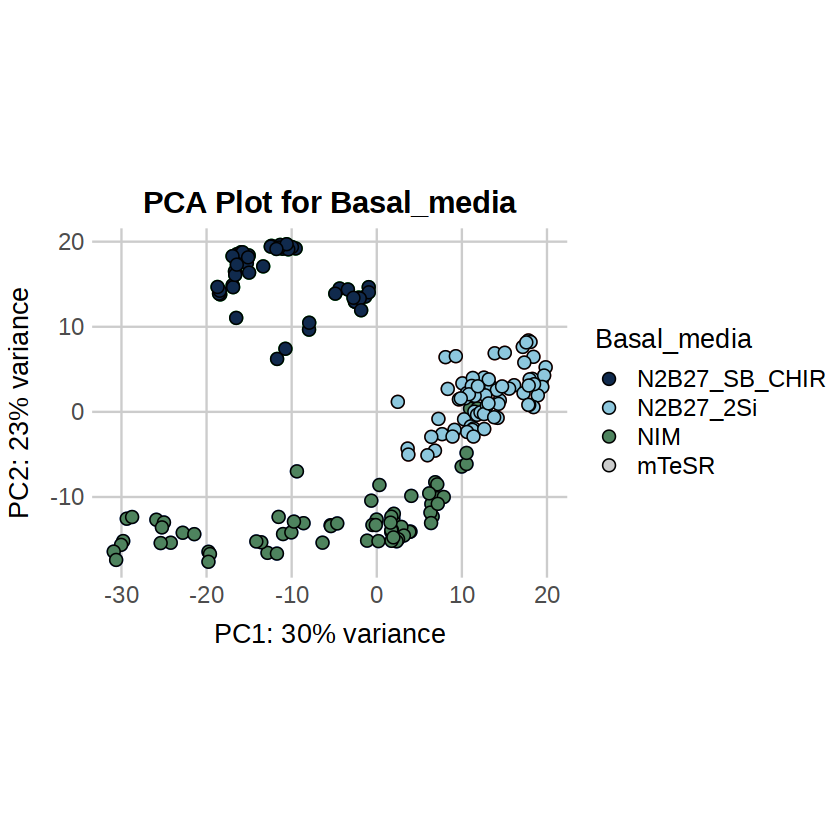

In [62]:
# Load necessary libraries
library(ggplot2)
library(DESeq2)  # Assuming you're using DESeq2 for vsd

# Define the custom color mapping for Basal_media
BM_colors <- c(  
    N2B27_SB_CHIR = '#102A4D',
    N2B27_2Si = '#8DC7DD',
    NIM = '#4E835E',
    mTeSR = '#CBCCCC'
)

# Create the PCA plot for 'Basal_media' with custom fill colors
p_sample <- plotPCA(object = vsd, intgroup = c('Basal_media')) +
  ggtitle('PCA Plot for Basal_media') +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
    axis.title.x = element_text(size = 16, margin = margin(t = 10)),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_blank()
  ) +
  geom_point(aes(fill = Basal_media), size = 3, shape = 21, color = "black", stroke = 0.5) + # Black outline with slight thickness
  scale_fill_manual(values = BM_colors) +  # Apply custom fill colors
  guides(color = "none")  # Remove the old legend

# Display the 'Basal_media' plot in the notebook
print(p_sample)

# Save the 'Basal_media' plot as a PDF file
ggsave("prepat_plots/PCA_Plot_BM_color.pdf", plot = p_sample, width = 8, height = 6)


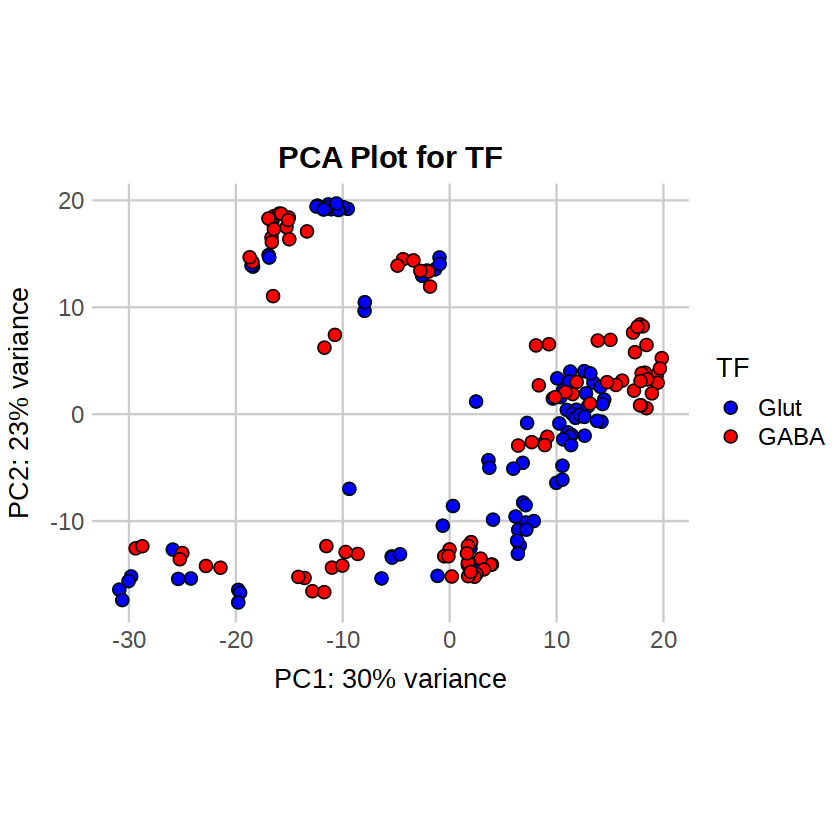

In [63]:
# Load necessary libraries
library(ggplot2)
library(DESeq2)  # Assuming you're using DESeq2 for vsd

# Define the custom color mapping for Basal_media
sample2ID <- c(
  '1' = 'p1_D4',
  '2' = 'p1_D8',
  '3' = 'p1_D10',
  '4' = 'p1_B4',
  '5' = 'p1_B8',
  '6' = 'p1_B10',
  '7' = 'p3_C2',
  '8' = 'p3_F2',
  '9' = 'p3_D1',
  '10' = 'p3_F4',
  '11' = 'p3_G1',
  '12' = 'p3_G10'
)

TF_colors <- c(    
    Glut = 'blue',
    GABA = 'red')


# Create the PCA plot for 'Basal_media' with custom fill colors
p_sample <- plotPCA(object = vsd, intgroup = c('TF')) +
  ggtitle('PCA Plot for TF') +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
    axis.title.x = element_text(size = 16, margin = margin(t = 10)),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_blank()
  ) +
  geom_point(aes(fill = TF), size = 3, shape = 21, color = "black", stroke = 0.5) + # Black outline with slight thickness
  scale_fill_manual(values = TF_colors) +  # Apply custom fill colors
  guides(color = "none")  # Remove the old legend

# Display the 'Basal_media' plot in the notebook
print(p_sample)

# Save the 'Basal_media' plot as a PDF file
ggsave("prepat_plots/PCA_Plot_TF_color.pdf", plot = p_sample, width = 8, height = 6)


In [44]:
# Load necessary libraries
library(ggplot2)

# Create a PCA plot for 'Basal_media' with enhanced aesthetics
p <- plotPCA(object = pca_df, intgroup = c('TF')) +
  ggtitle('PCA Plot for TF') +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),  # Larger, centered, bold title
    axis.title.x = element_text(size = 16, margin = margin(t = 10)),   # Larger x-axis label
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),   # Larger y-axis label
    axis.text.x = element_text(size = 14),                            # Larger x-axis tick labels
    axis.text.y = element_text(size = 14),                            # Larger y-axis tick labels
    legend.title = element_text(size = 16),                           # Larger legend title
    legend.text = element_text(size = 14),                            # Larger legend text
    panel.grid.major = element_line(color = "gray80"),                # Lighter major gridlines
    panel.grid.minor = element_blank()                                # Remove minor gridlines
  )

# Save the plot as a PDF file
ggsave("prepat_plots/PCA_Plot_TF.pdf", plot = p, width = 8, height = 6)


In [43]:
# Load necessary libraries
library(ggplot2)

# Create a PCA plot for 'Basal_media' with enhanced aesthetics
p <- plotPCA(object = pca_df, intgroup = c('Basal_media')) +
  ggtitle('PCA Plot for Basal Media') +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),  # Larger, centered, bold title
    axis.title.x = element_text(size = 16, margin = margin(t = 10)),   # Larger x-axis label
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),   # Larger y-axis label
    axis.text.x = element_text(size = 14),                            # Larger x-axis tick labels
    axis.text.y = element_text(size = 14),                            # Larger y-axis tick labels
    legend.title = element_text(size = 16),                           # Larger legend title
    legend.text = element_text(size = 14),                            # Larger legend text
    panel.grid.major = element_line(color = "gray80"),                # Lighter major gridlines
    panel.grid.minor = element_blank()                                # Remove minor gridlines
  )

# Save the plot as a PDF file
ggsave("prepat_plots/PCA_Plot_Basal_Media.pdf", plot = p, width = 8, height = 6)


In [41]:
# Load necessary libraries
library(ggplot2)
library(gridExtra)  # For arranging multiple plots in a grid

# Custom function to create a PCA plot with enhanced aesthetics
plotPCA_custom <- function(pca_df, variable) {
  plotPCA(object = pca_df, intgroup = c(variable)) +
    ggtitle(paste('PCA Plot for', variable)) +
    theme_minimal() +
    theme(
      plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),  # Larger, centered title
      axis.title.x = element_text(size = 16, margin = margin(t = 10)),   # Larger x-axis label
      axis.title.y = element_text(size = 16, margin = margin(r = 10)),   # Larger y-axis label
      axis.text.x = element_text(size = 14),                            # Larger x-axis tick labels
      axis.text.y = element_text(size = 14),                            # Larger y-axis tick labels
      legend.title = element_text(size = 16),                           # Larger legend title
      legend.text = element_text(size = 14),                            # Larger legend text
      panel.grid.major = element_line(color = "gray80"),                # Lighter major gridlines
      panel.grid.minor = element_blank()                                # Remove minor gridlines
    )
}

# List of variables to plot
variables <- c('M_BMP4', 'M_SHH', 'M_RA', 'M_CHIR', 'M_XAV', 'M_FGF8')

# Generate a list of PCA plots with enhanced aesthetics
plots <- lapply(variables, function(var) plotPCA_custom(vsd, var))

# Export the arranged plots as a PDF with specified dimensions
pdf("prepat_plots/PCA_Plots_Publication.pdf", width = 15, height = 10)

# Arrange the plots in a grid (2 rows, 3 columns)
grid.arrange(grobs = plots, ncol = 3)

# Close the PDF device
dev.off()


png 
  2

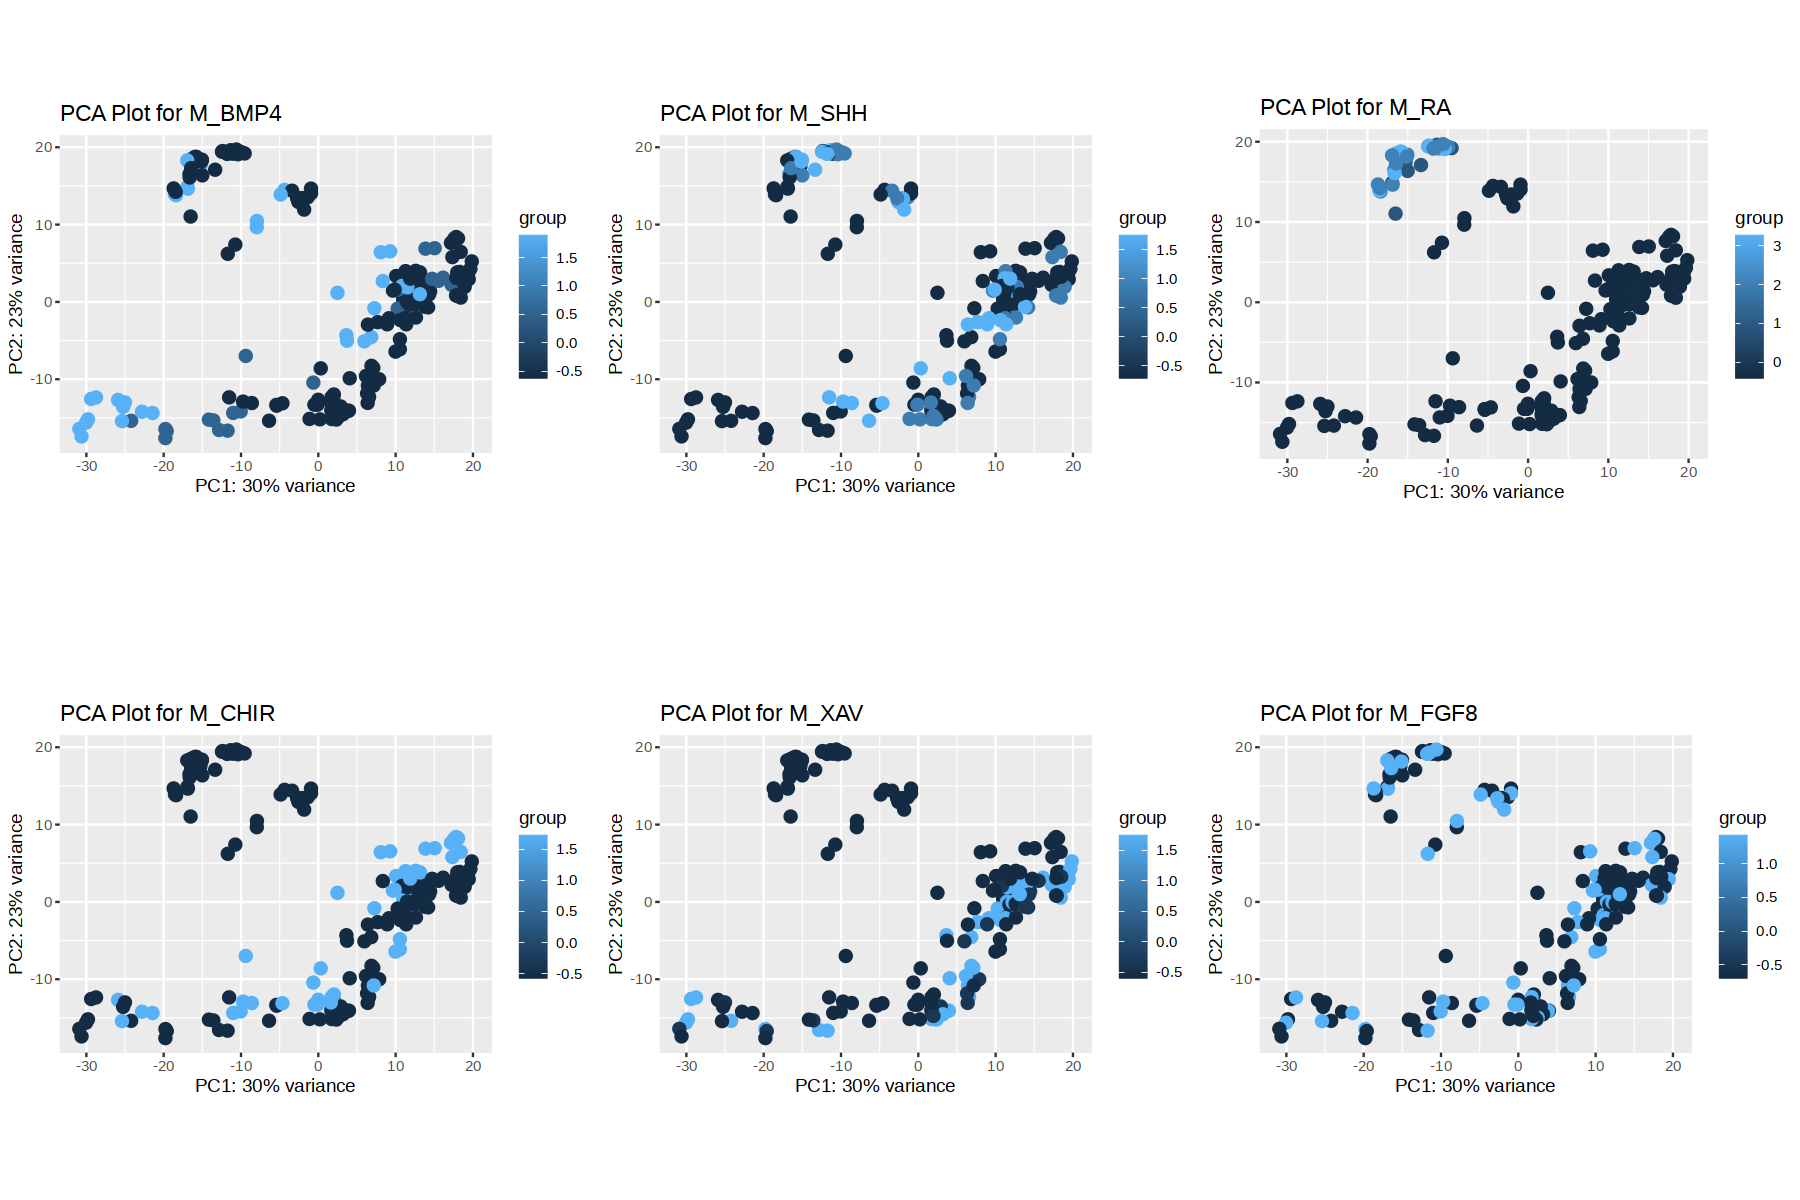

In [38]:
# Assuming pca_df is your data frame and 'object' is the PCA object used for plotting

# Function to create a PCA plot for a given variable
plotPCA_custom <- function(pca_df, variable) {
  plotPCA(object = pca_df, intgroup = c(variable)) +
    ggtitle(paste('PCA Plot for', variable))
}

# List of variables to plot
variables <- c('M_BMP4', 'M_SHH', 'M_RA', 'M_CHIR', 'M_XAV', 'M_FGF8')

# Set plot size
options(repr.plot.width=15, repr.plot.height=10)

# Generate a list of PCA plots
plots <- lapply(variables, function(var) plotPCA_custom(vsd, var))

# Arrange the plots in a grid (2 rows, 3 columns)
grid.arrange(grobs = plots, ncol = 3)


In [64]:
# Load necessary libraries
library(ggplot2)
library(ggrepel)

# Set plot options
options(repr.plot.width = 15, repr.plot.height = 5)

# Example genes of interest
genes_of_interest <- c("ASCL1", "DLX2", "NEUROG2", "PAX6", "OTX2", "CDX1", "PRDM1", "HOXB3", "HOXB4", "FOXA2", "RFX4", "FOXG1", "SNAI2")

# Extract PCA data
pcaData <- plotPCA(vsd, intgroup = c("condition", "TF"), returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))

# Loop through genes and create/save plots
for (gene in genes_of_interest) {
  # Extract expression values for the current gene
  gene_expression <- assay(vsd)[gene, ]
  
  # Add gene expression to pcaData
  pcaData[[gene]] <- gene_expression
  
  # Create PCA plot for the current gene
  gene_plot <- ggplot(pcaData, aes_string(x = "PC1", y = "PC2", fill = gene)) +
    geom_point(shape = 21, size = 3, color = "black", stroke = 0.5) +  # Black outline with stroke
    xlab(paste0("PC1: ", percentVar[1], "% variance")) +
    ylab(paste0("PC2: ", percentVar[2], "% variance")) +
    scale_fill_gradient(low = "blue", high = "red") +  # Use fill aesthetic for gradient
    theme_minimal() +
    ggtitle(paste("PCA Plot for", gene)) +
    facet_wrap(~ TF) +
    theme(
      plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),  # Larger, centered title
      axis.title.x = element_text(size = 16, margin = margin(t = 10)),   # Larger x-axis label
      axis.title.y = element_text(size = 16, margin = margin(r = 10)),   # Larger y-axis label
      axis.text.x = element_text(size = 14),                            # Larger x-axis tick labels
      axis.text.y = element_text(size = 14),                            # Larger y-axis tick labels
      legend.title = element_text(size = 16),                           # Larger legend title
      legend.text = element_text(size = 14),                            # Larger legend text
      panel.grid.major = element_line(color = "gray80"),                # Lighter major gridlines
      panel.grid.minor = element_blank(),                               # Remove minor gridlines
      panel.spacing = unit(2, "lines")                                  # Adjust facet spacing
    )
  
  # Save each plot as a separate PDF file
  ggsave(filename = paste0("prepat_plots/PCA_Plot_", gene, "_outline.pdf"), plot = gene_plot, width = 15, height = 5)
}


In [68]:
# Load necessary libraries
library(ggplot2)
library(ggrepel)

# Set plot options
options(repr.plot.width = 15, repr.plot.height = 5)

# Example genes of interest
genes_of_interest <- c("ASCL1", "DLX2", "NEUROG2", "PAX6", "OTX2", "CDX1", "PRDM1", "HOXB3", "HOXB4", "FOXA2", "RFX4", "FOXG1", "SNAI2")

# Extract PCA data
pcaData <- plotPCA(vsd, intgroup = c("condition", "TF"), returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))

# Loop through genes and create/save plots
for (gene in genes_of_interest) {
  # Extract expression values for the current gene
  gene_expression <- assay(vsd)[gene, ]
  
  # Add gene expression to pcaData
  pcaData[[gene]] <- gene_expression
  
  # Create PCA plot for the current gene
  gene_plot <- ggplot(pcaData, aes_string(x = "PC1", y = "PC2", fill = gene)) +
    geom_point(shape = 21, size = 3, color = "black", stroke = 0.5) +  # Black outline with stroke
    xlab(paste0("PC1: ", percentVar[1], "% variance")) +
    ylab(paste0("PC2: ", percentVar[2], "% variance")) +
    scale_fill_gradient(low = "blue", high = "red") +  # Use fill aesthetic for gradient
    theme_minimal() +
    ggtitle(paste("PCA Plot for", gene)) +
    facet_wrap(~ TF) +
    theme(
      plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),  # Larger, centered title
      axis.title.x = element_text(size = 16, margin = margin(t = 10)),   # Larger x-axis label
      axis.title.y = element_text(size = 16, margin = margin(r = 10)),   # Larger y-axis label
      axis.text.x = element_text(size = 14),                            # Larger x-axis tick labels
      axis.text.y = element_text(size = 14),                            # Larger y-axis tick labels
      legend.title = element_text(size = 16),                           # Larger legend title
      legend.text = element_text(size = 14),                            # Larger legend text
      panel.grid.major = element_line(color = "gray80"),                # Lighter major gridlines
      panel.grid.minor = element_blank(),                               # Remove minor gridlines
      panel.spacing = unit(2, "lines")                                  # Adjust facet spacing
    ) + theme(legend.position = "none")
  
  # Save each plot as a separate PDF file
  ggsave(filename = paste0("prepat_plots/PCA_Plot_", gene, "_outline2.pdf"), plot = gene_plot, width = 8, height = 4)
}


In [42]:
# Load necessary libraries
library(ggplot2)
library(ggrepel)

# Set plot options
options(repr.plot.width=15, repr.plot.height=5)

# Example genes of interest
genes_of_interest <- c("ASCL1","DLX2","NEUROG2","PAX6", "OTX2","CDX1","PRDM1",'HOXB3','HOXB4','FOXA2','RFX4','FOXG1','SNAI2')

# Extract PCA data
pcaData <- plotPCA(vsd, intgroup = c("condition", "TF"), returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))

# Loop through genes and create/save plots
for (gene in genes_of_interest) {
  # Extract expression values for the current gene
  gene_expression <- assay(vsd)[gene, ]
  
  # Add gene expression to pcaData
  pcaData[[gene]] <- gene_expression
  
  # Create PCA plot for the current gene
  gene_plot <- ggplot(pcaData, aes_string(x = "PC1", y = "PC2", color = gene)) +
    geom_point(size = 3) +
    xlab(paste0("PC1: ", percentVar[1], "% variance")) +
    ylab(paste0("PC2: ", percentVar[2], "% variance")) +
    scale_color_gradient(low = "blue", high = "red") +
    theme_minimal() +
    ggtitle(paste("PCA Plot for", gene)) +
    facet_wrap(~ TF) +
    theme(
      plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),  # Larger, centered title
      axis.title.x = element_text(size = 16, margin = margin(t = 10)),   # Larger x-axis label
      axis.title.y = element_text(size = 16, margin = margin(r = 10)),   # Larger y-axis label
      axis.text.x = element_text(size = 14),                            # Larger x-axis tick labels
      axis.text.y = element_text(size = 14),                            # Larger y-axis tick labels
      legend.title = element_text(size = 16),                           # Larger legend title
      legend.text = element_text(size = 14),                            # Larger legend text
      panel.grid.major = element_line(color = "gray80"),                # Lighter major gridlines
      panel.grid.minor = element_blank(),                               # Remove minor gridlines
      panel.spacing = unit(2, "lines")                                  # Adjust facet spacing
    )
  
  # Save each plot as a separate PDF file
  ggsave(filename = paste0("prepat_plots/PCA_Plot_", gene, ".pdf"), plot = gene_plot, width = 15, height = 5)
}


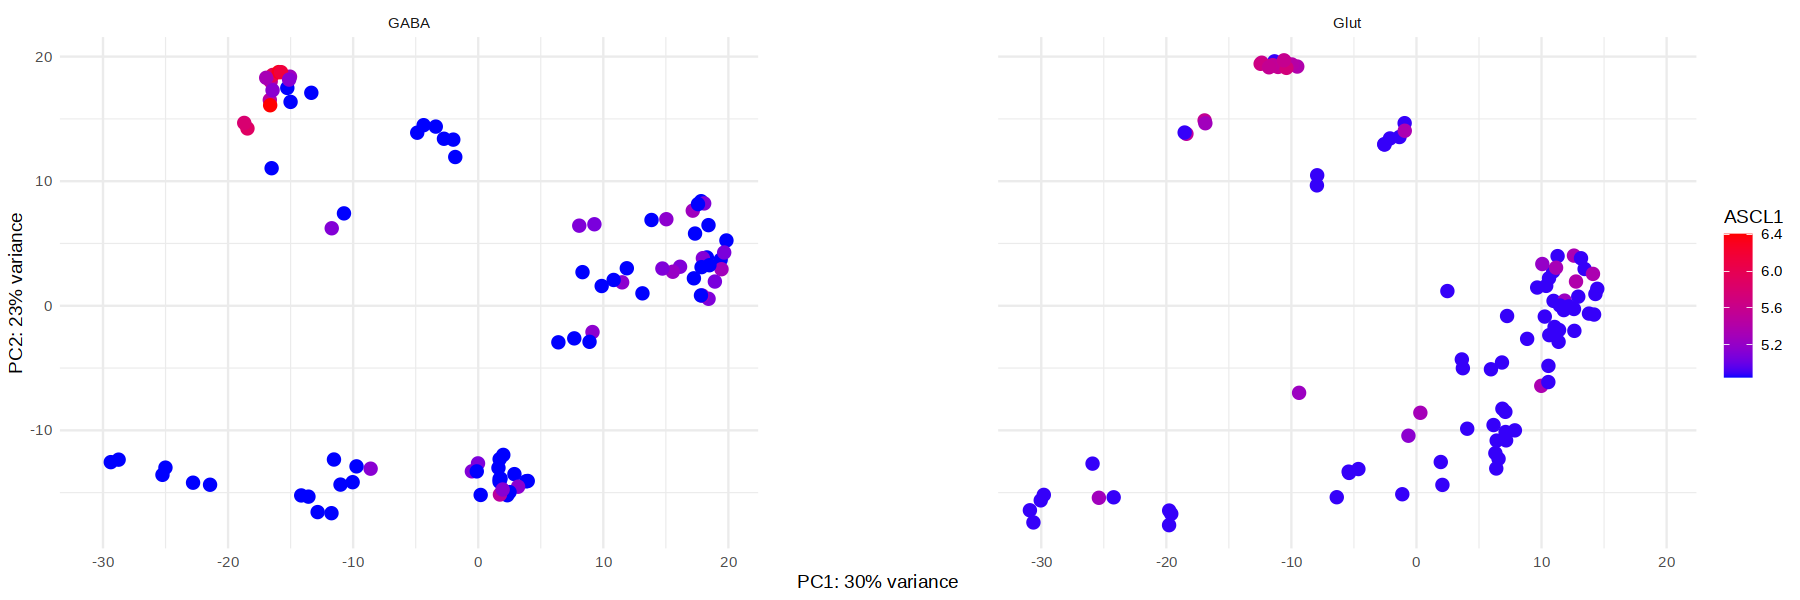

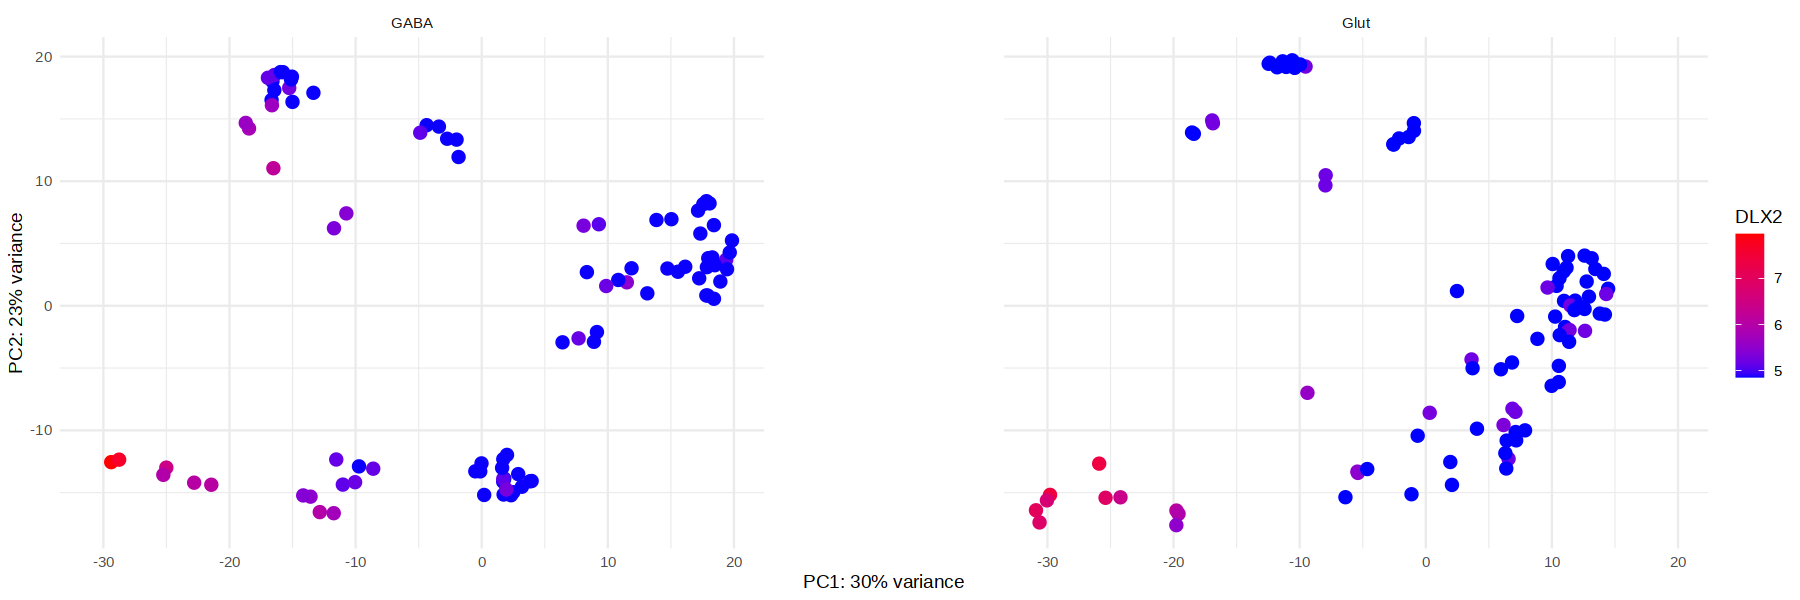

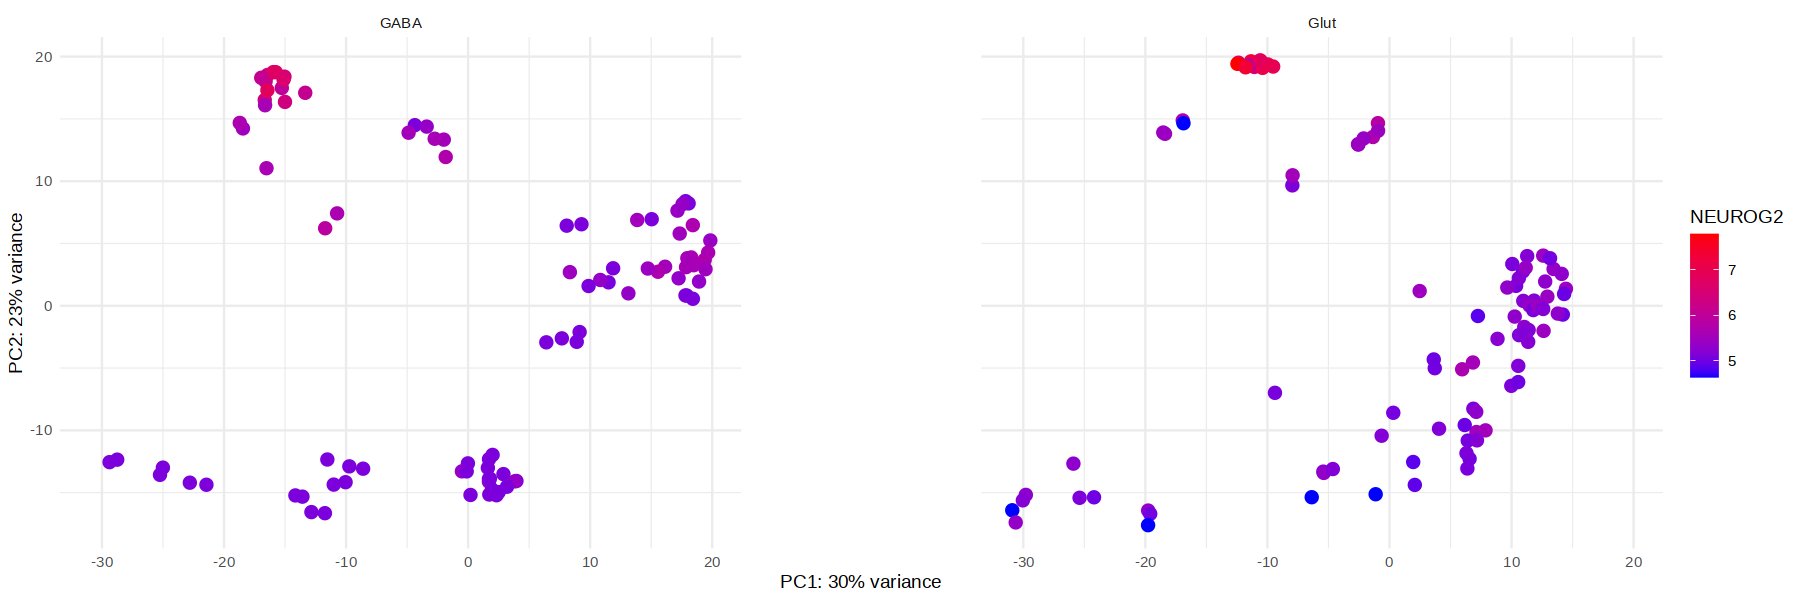

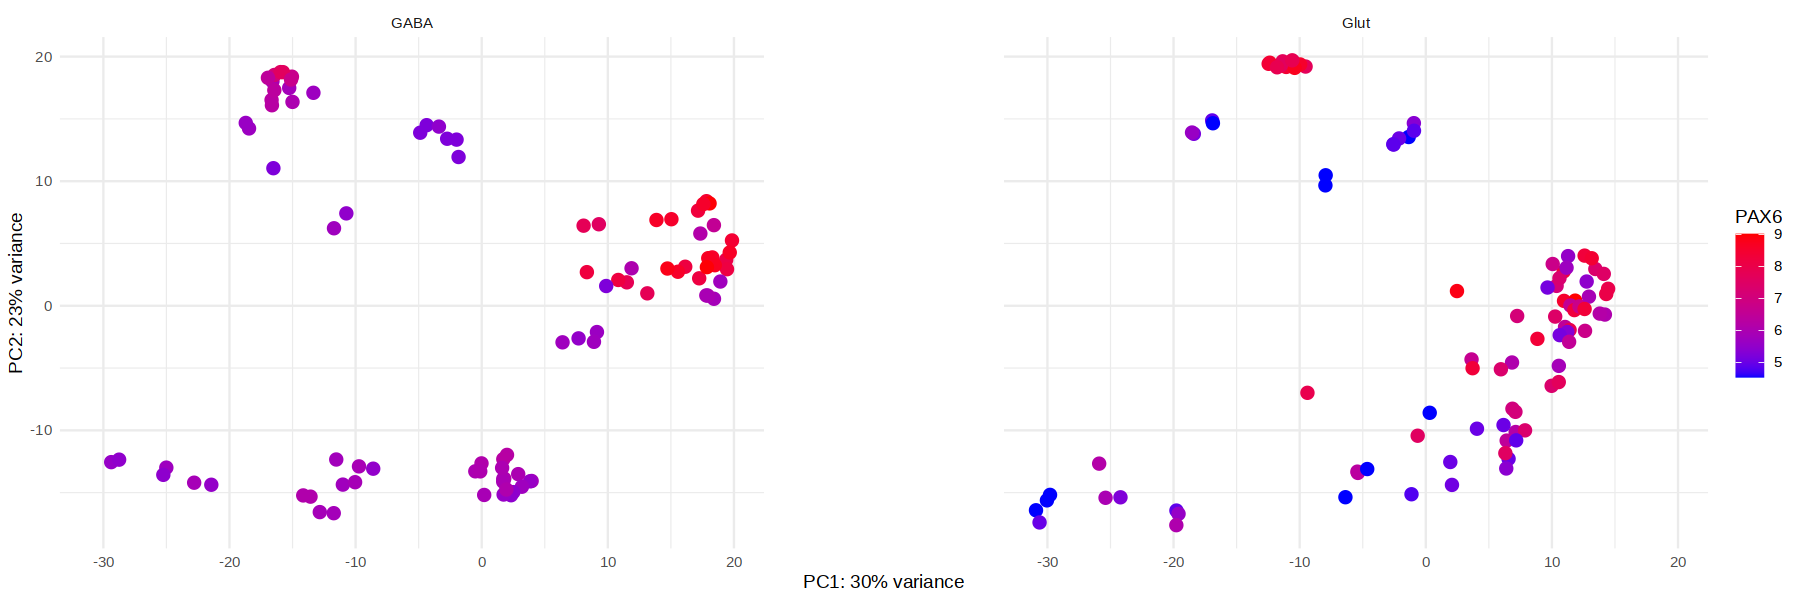

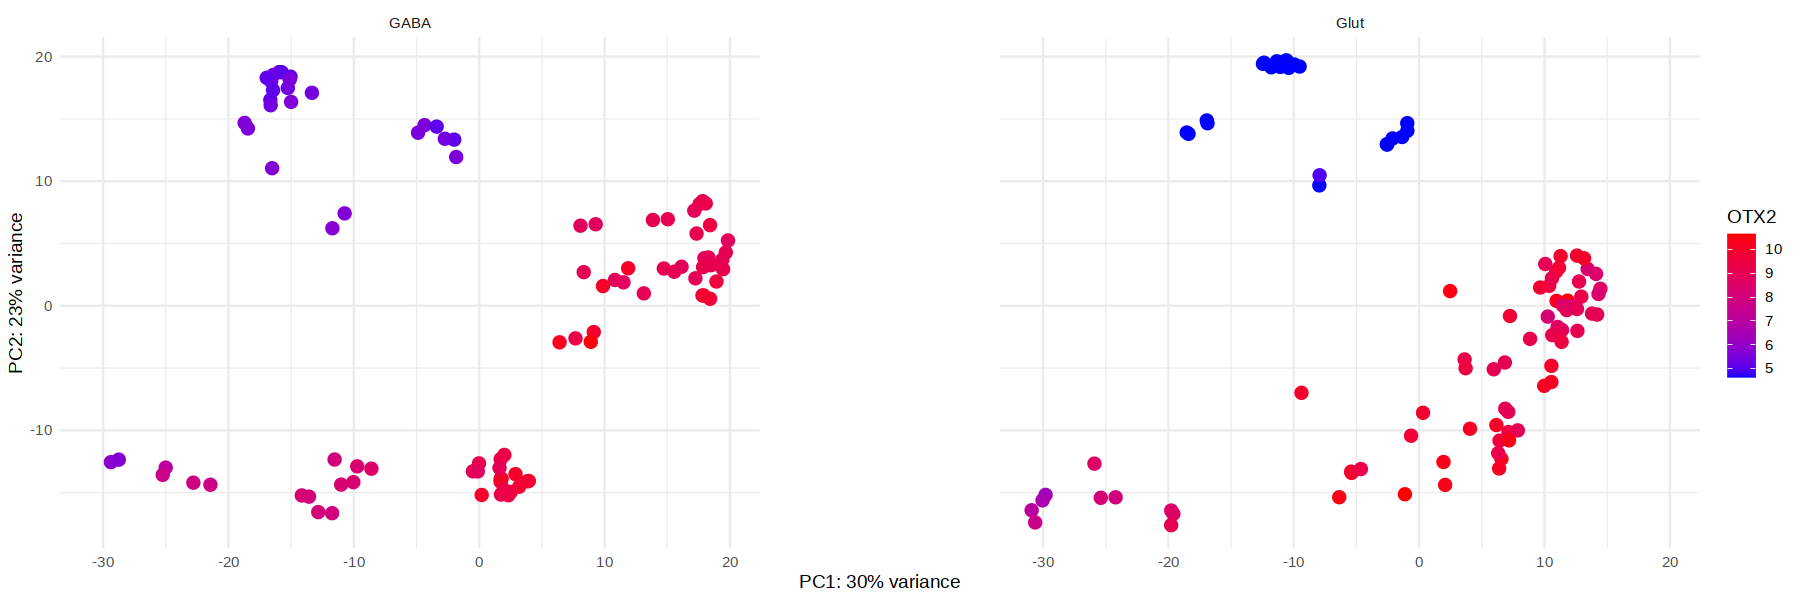

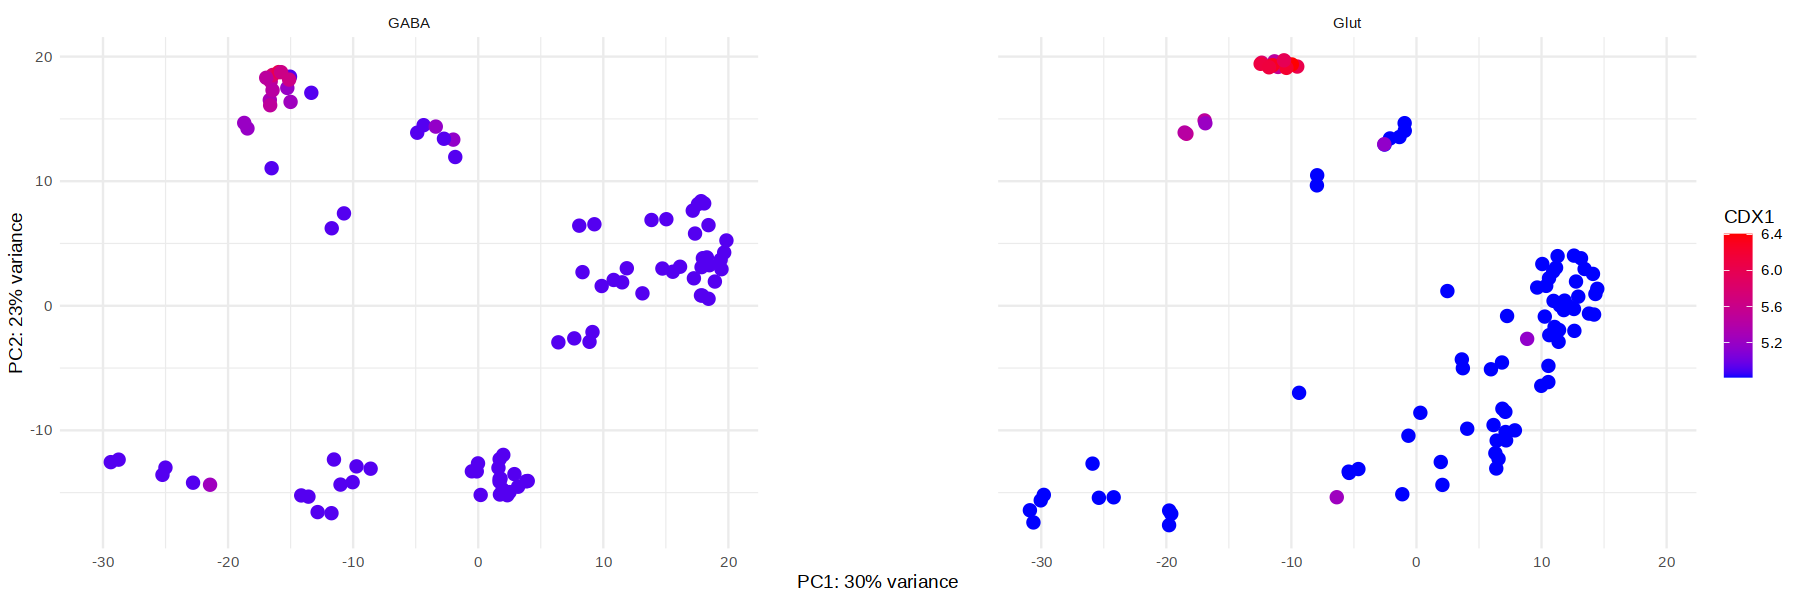

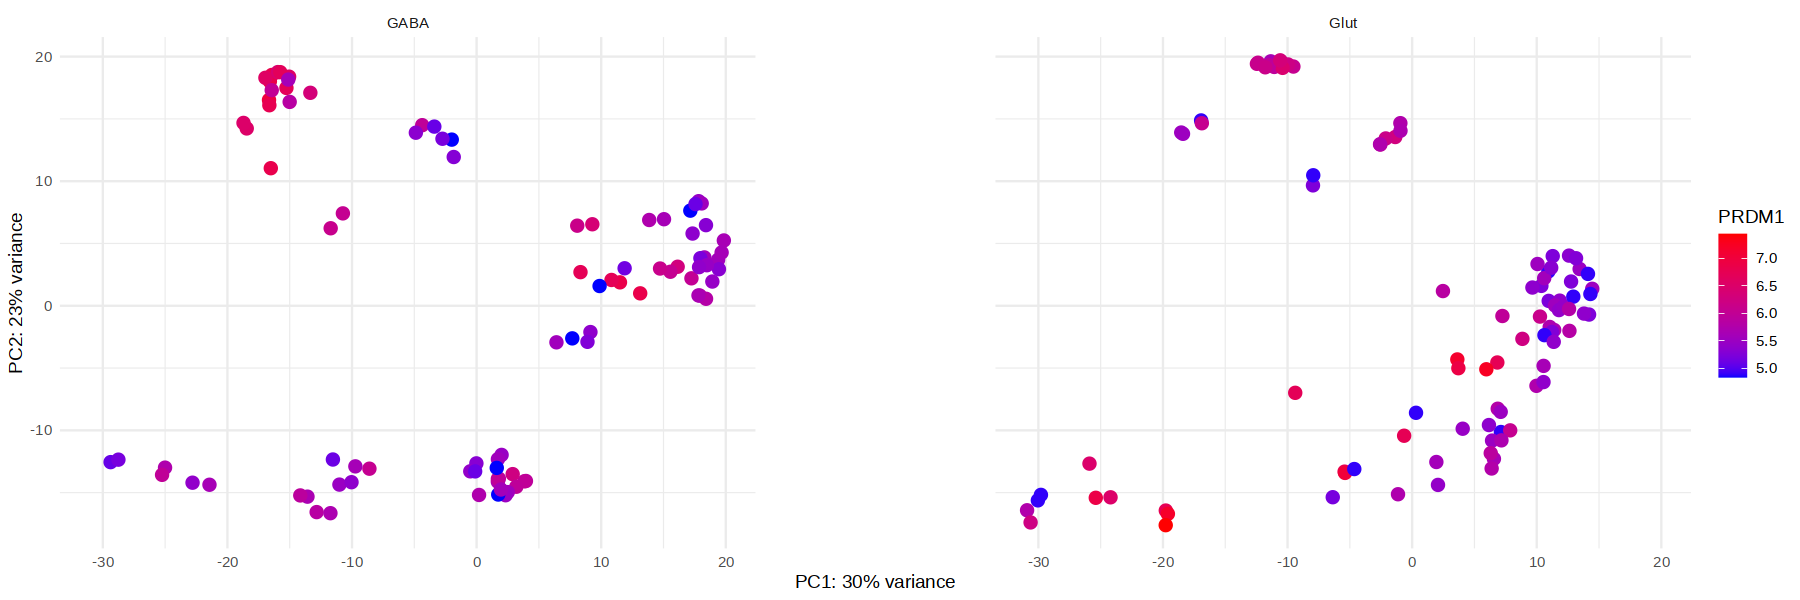

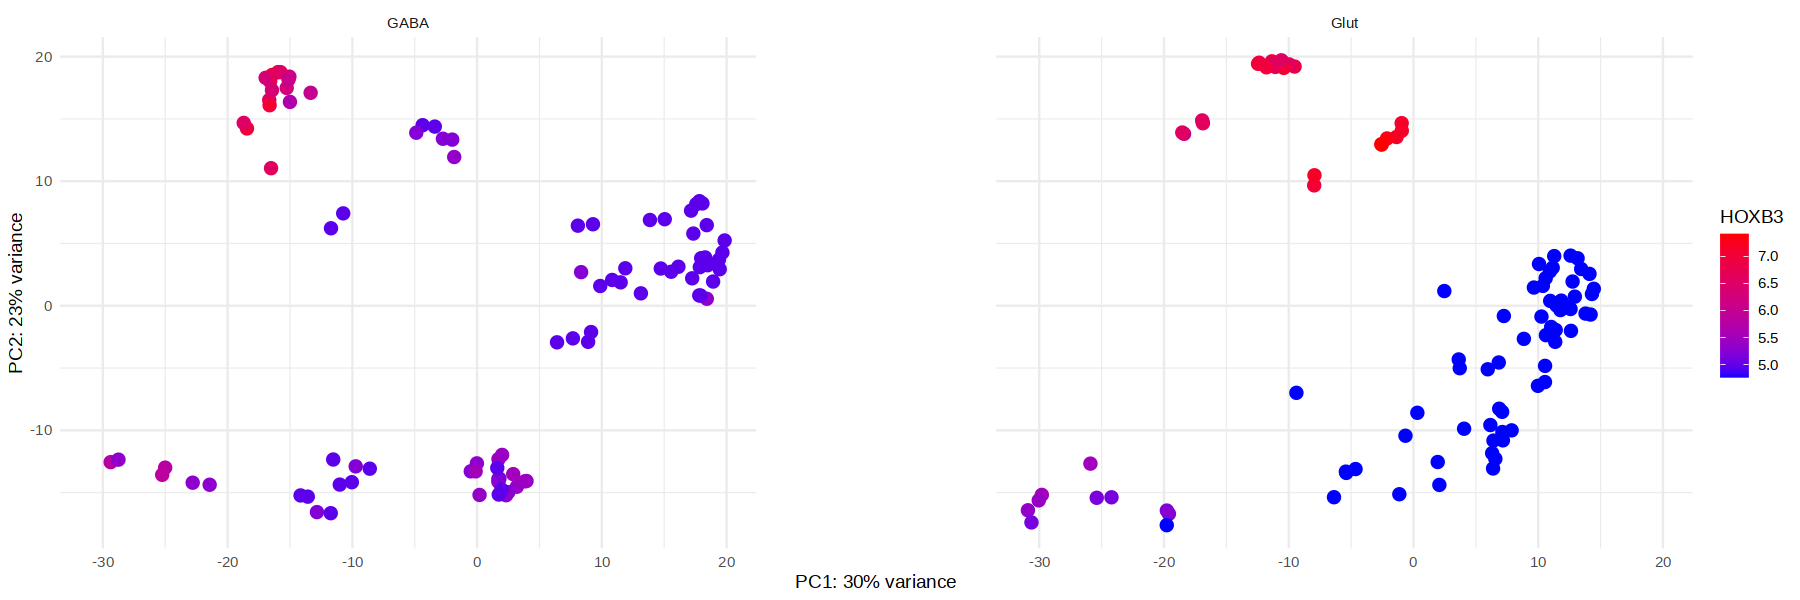

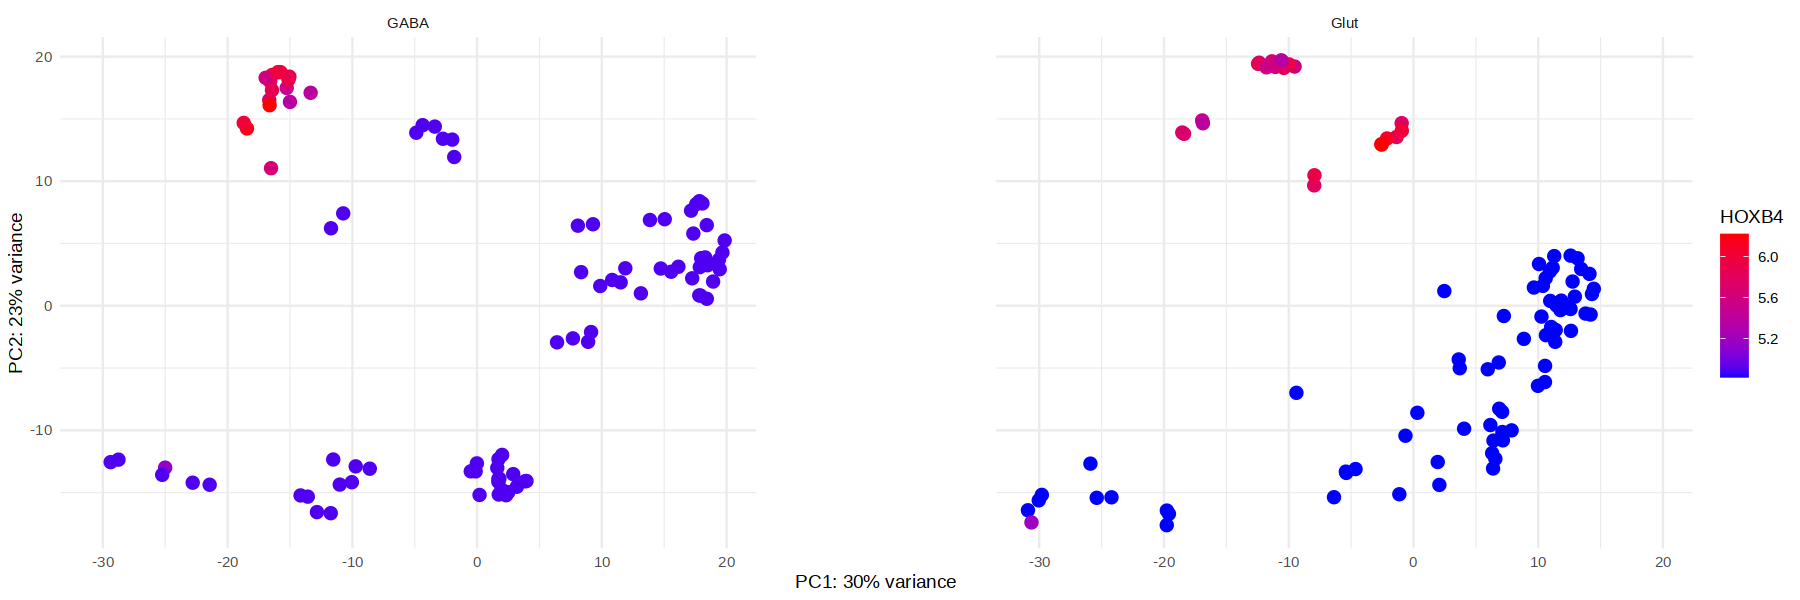

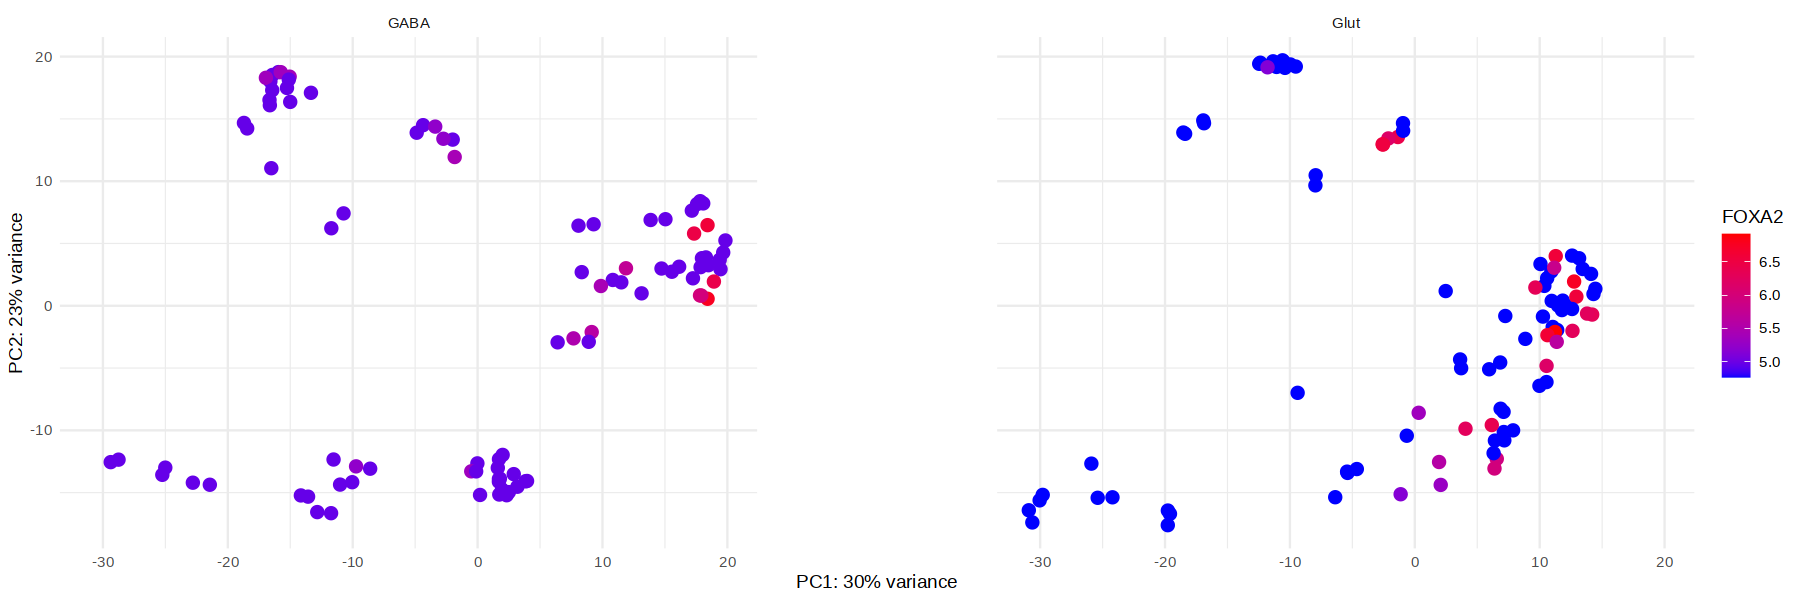

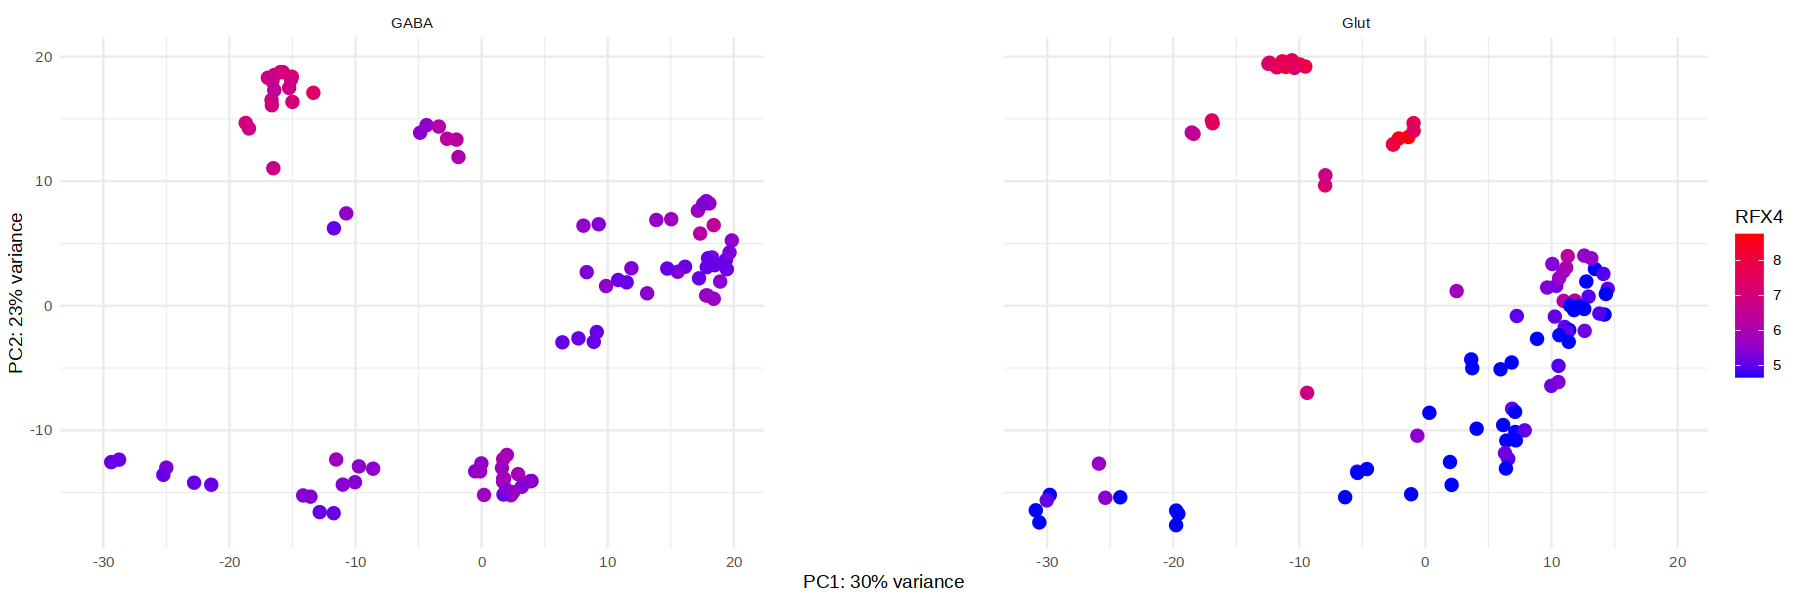

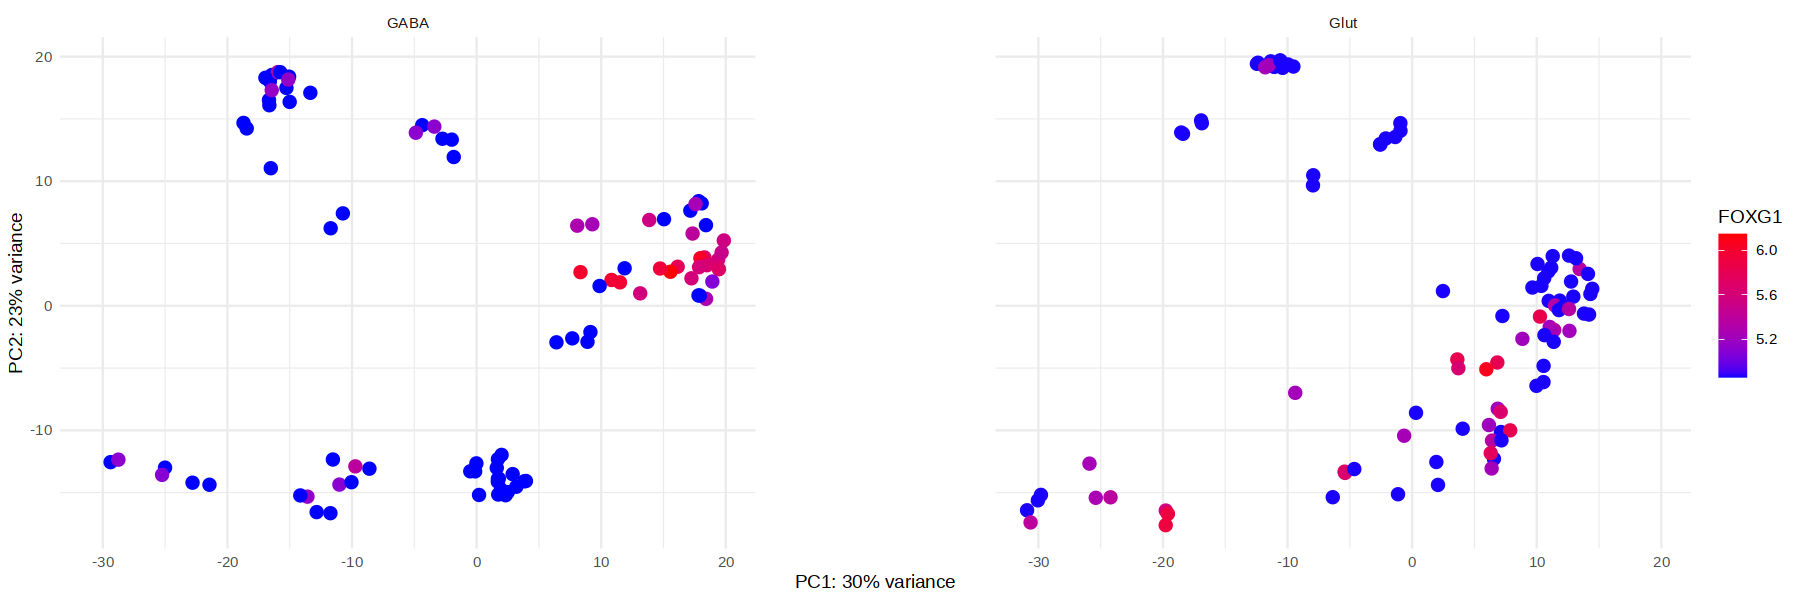

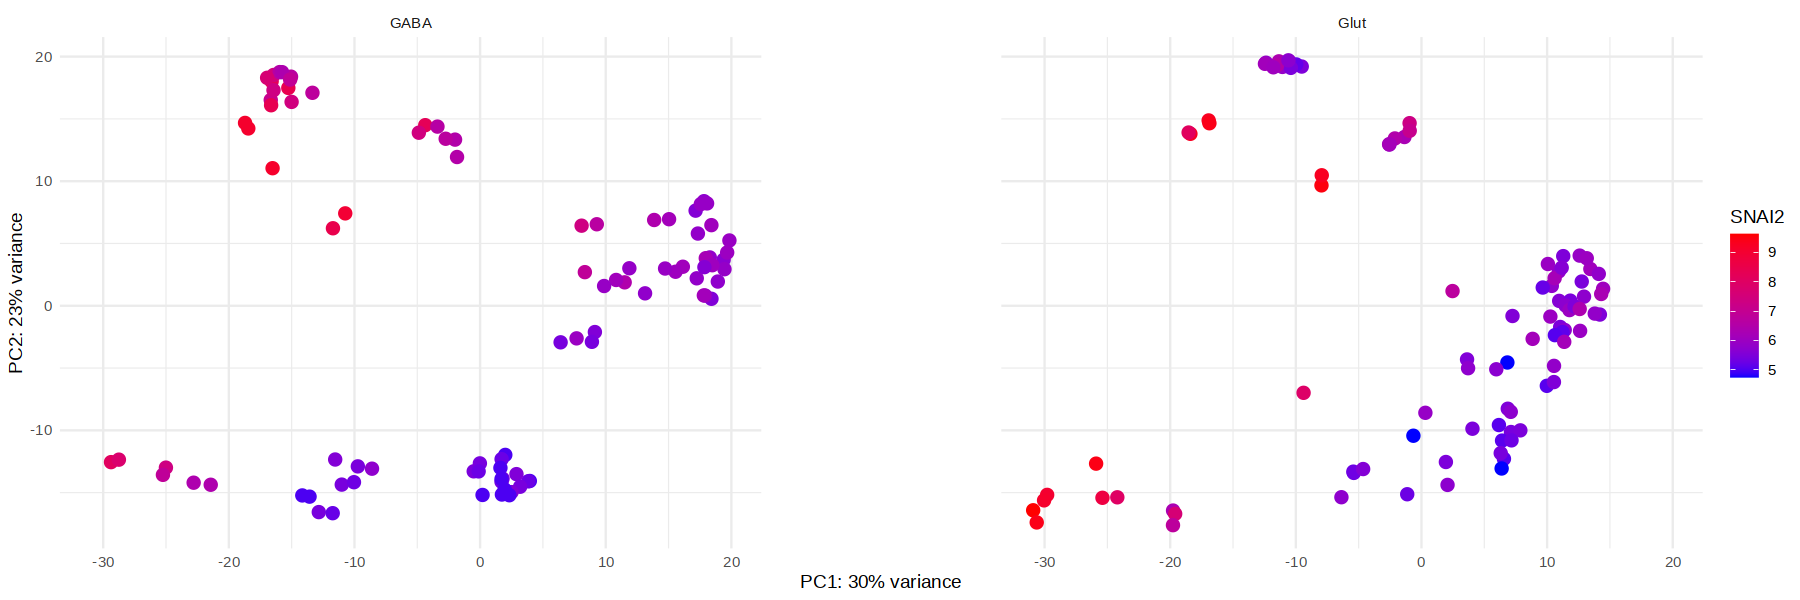

In [45]:
library(ggplot2)
library(ggrepel)
options(repr.plot.width=15, repr.plot.height=5)

# Example genes of interest
genes_of_interest <- c("ASCL1","DLX2","NEUROG2","PAX6", "OTX2","CDX1","PRDM1",'HOXB3','HOXB4','FOXA2','RFX4','FOXG1','SNAI2')

# Extract PCA data
pcaData <- plotPCA(vsd, intgroup = c("condition", "TF"), returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))

# Loop through genes and create plots
for (gene in genes_of_interest) {
  # Extract expression values for the current gene
  gene_expression <- assay(vsd)[gene, ]
  
  # Add gene expression to pcaData
  pcaData[[gene]] <- gene_expression
  
  # Create PCA plot for the current gene
  gene_plot <- ggplot(pcaData, aes_string(x = "PC1", y = "PC2", color = gene)) +
    geom_point(size = 3) +
    xlab(paste0("PC1: ", percentVar[1], "% variance")) +
    ylab(paste0("PC2: ", percentVar[2], "% variance")) +
    scale_color_gradient(low = "blue", high = "red") +
    theme_minimal() +
    facet_wrap(~ TF) +
    theme(panel.spacing = unit(10, "lines"))  # Adjust facet spacing as needed
  
  # Print the plot
  print(gene_plot)
}


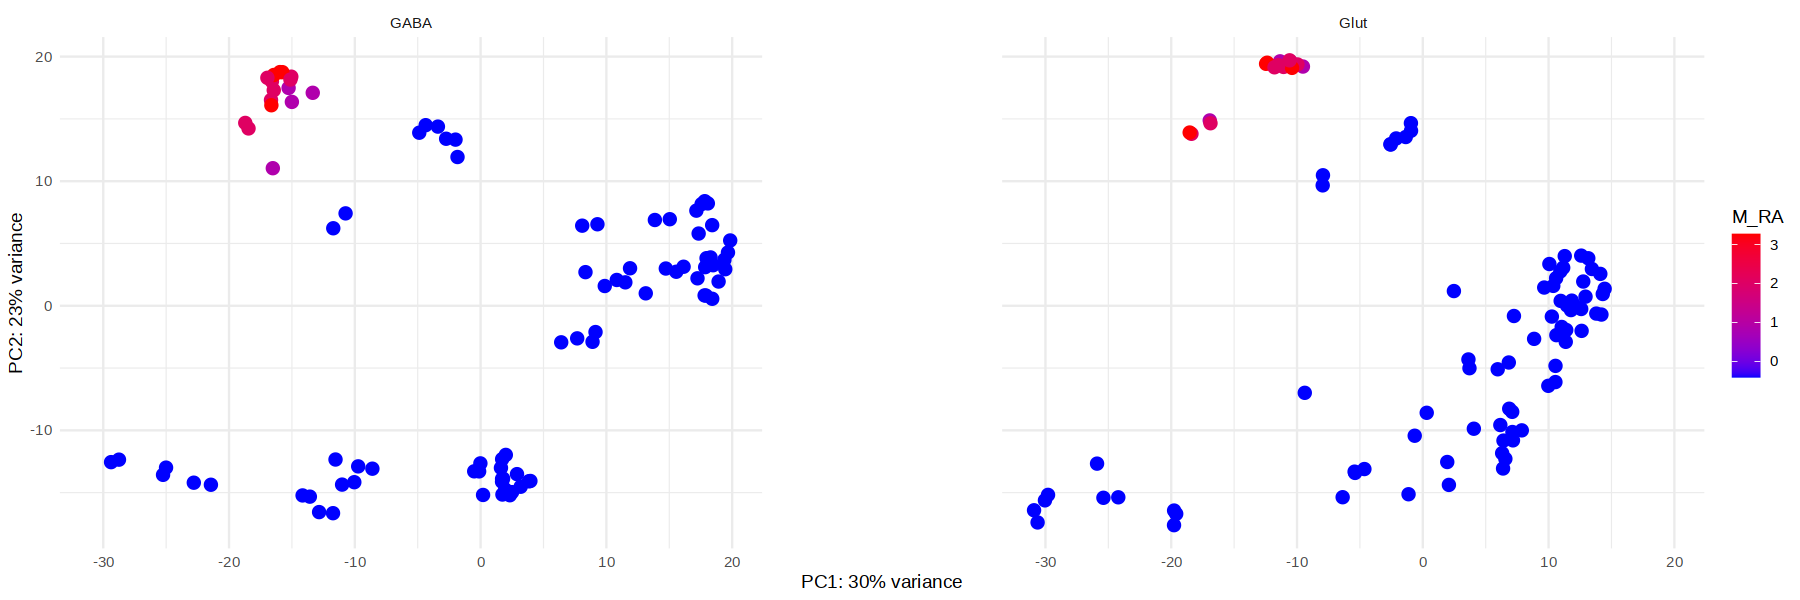

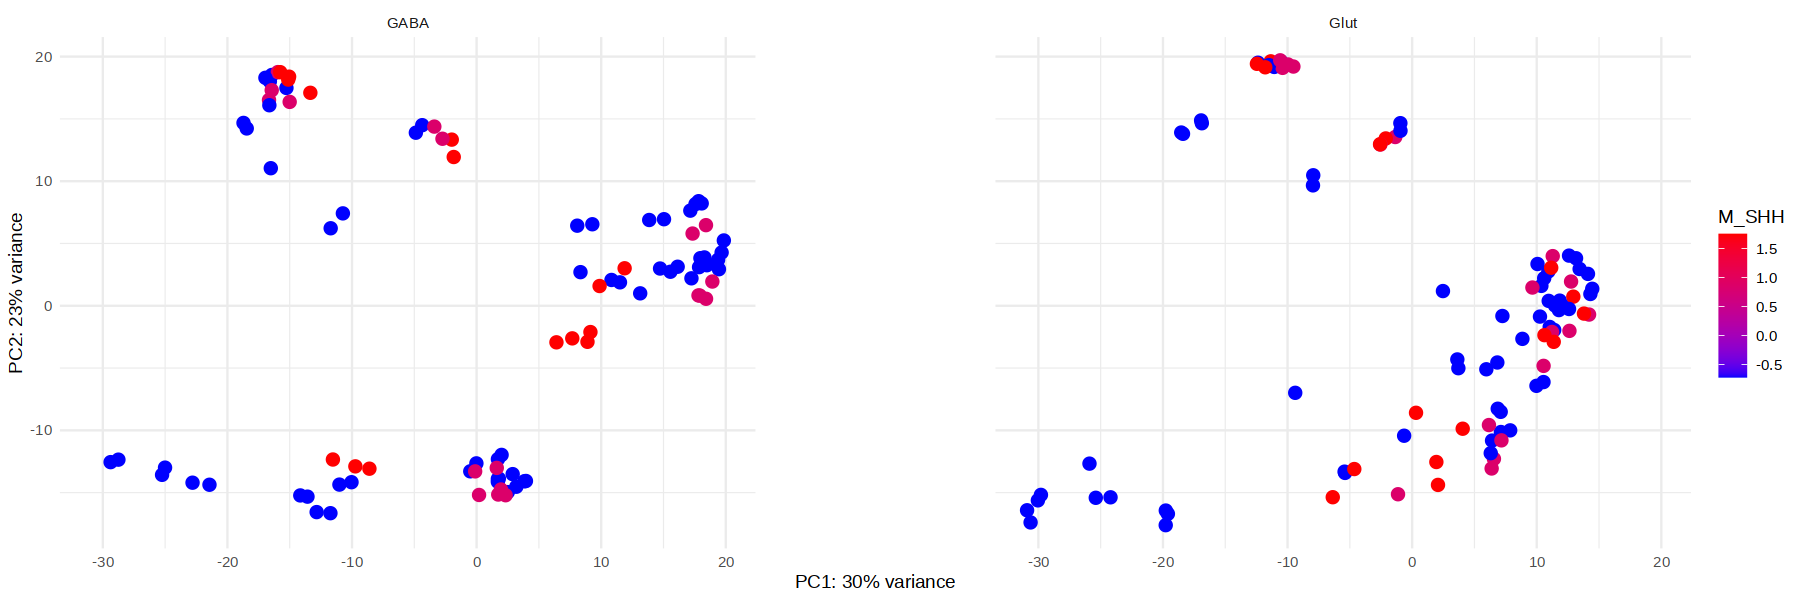

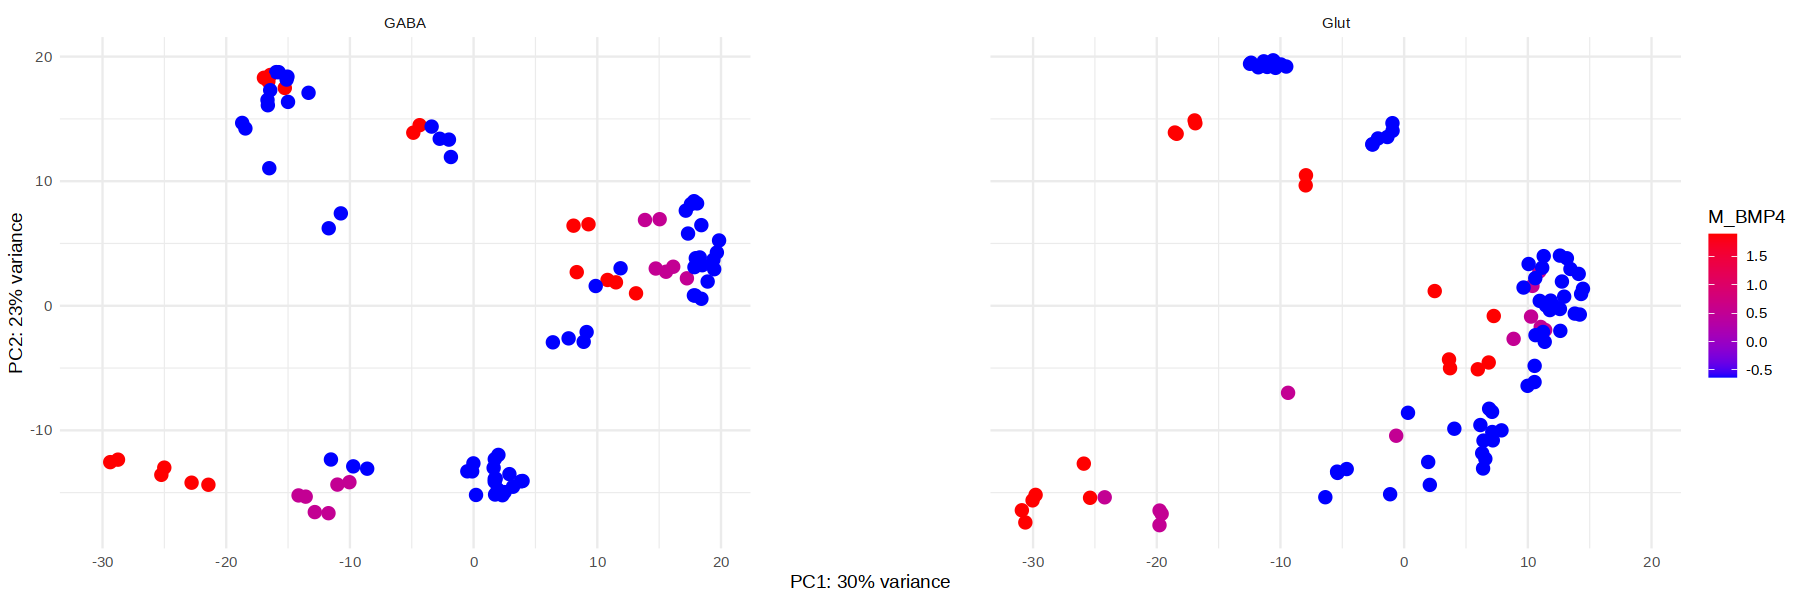

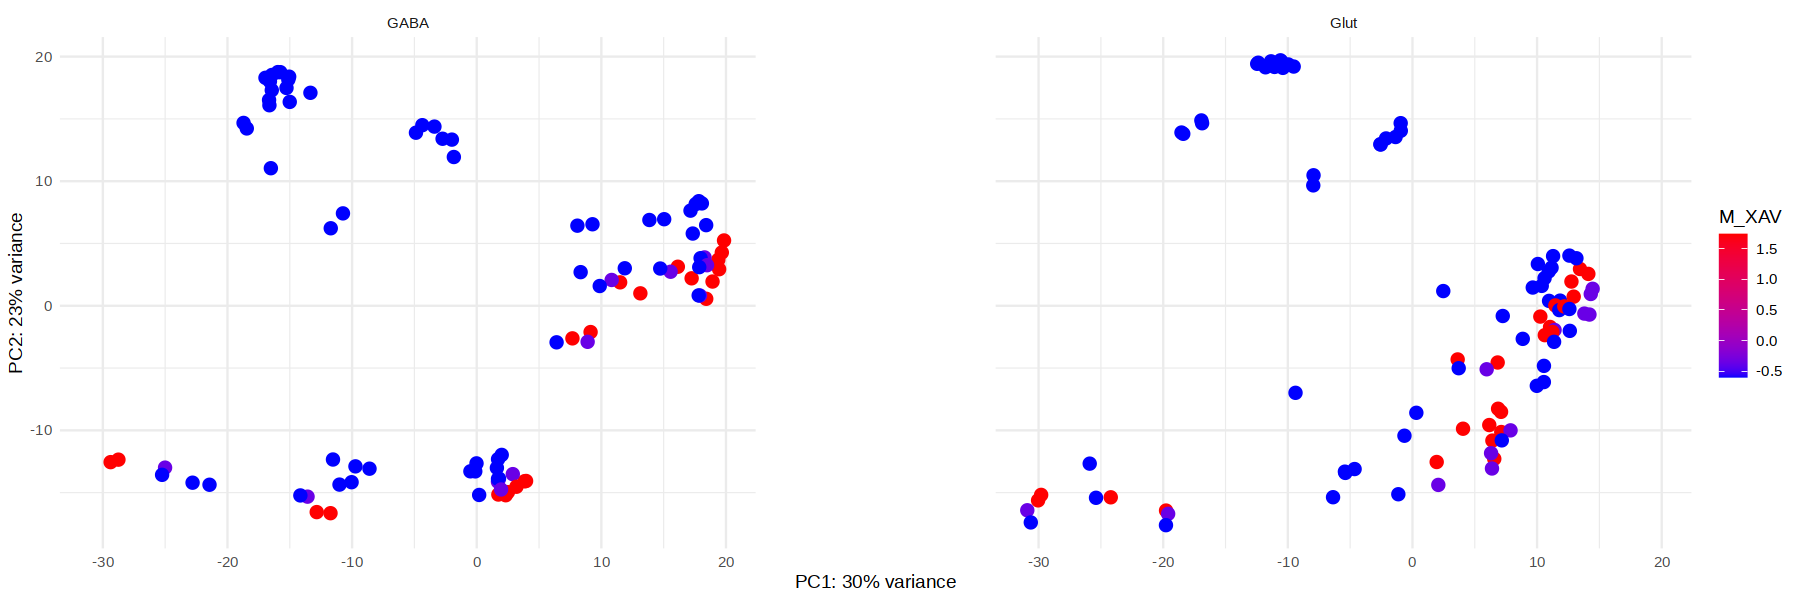

In [47]:
library(ggplot2)
library(ggrepel)

# Example genes of interest
l1 <- genes_of_interest <- c("M_RA","M_SHH","M_BMP4","M_XAV")
l2 <- c("condition", "TF")

# Extract PCA data
pcaData <- plotPCA(vsd, intgroup = append(l1, l2), returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))

# Loop through genes and create plots
for (gene in genes_of_interest) {  
  # Create PCA plot for the current gene
  gene_plot <- ggplot(pcaData, aes_string(x = "PC1", y = "PC2", color = gene)) +
    geom_point(size = 3) +
    xlab(paste0("PC1: ", percentVar[1], "% variance")) +
    ylab(paste0("PC2: ", percentVar[2], "% variance")) +
    scale_color_gradient(low = "blue", high = "red") +
    theme_minimal() +
    facet_wrap(~ TF) +
    theme(panel.spacing = unit(10, "lines"))  # Adjust facet spacing as needed
  
  # Print the plot
  print(gene_plot)
}


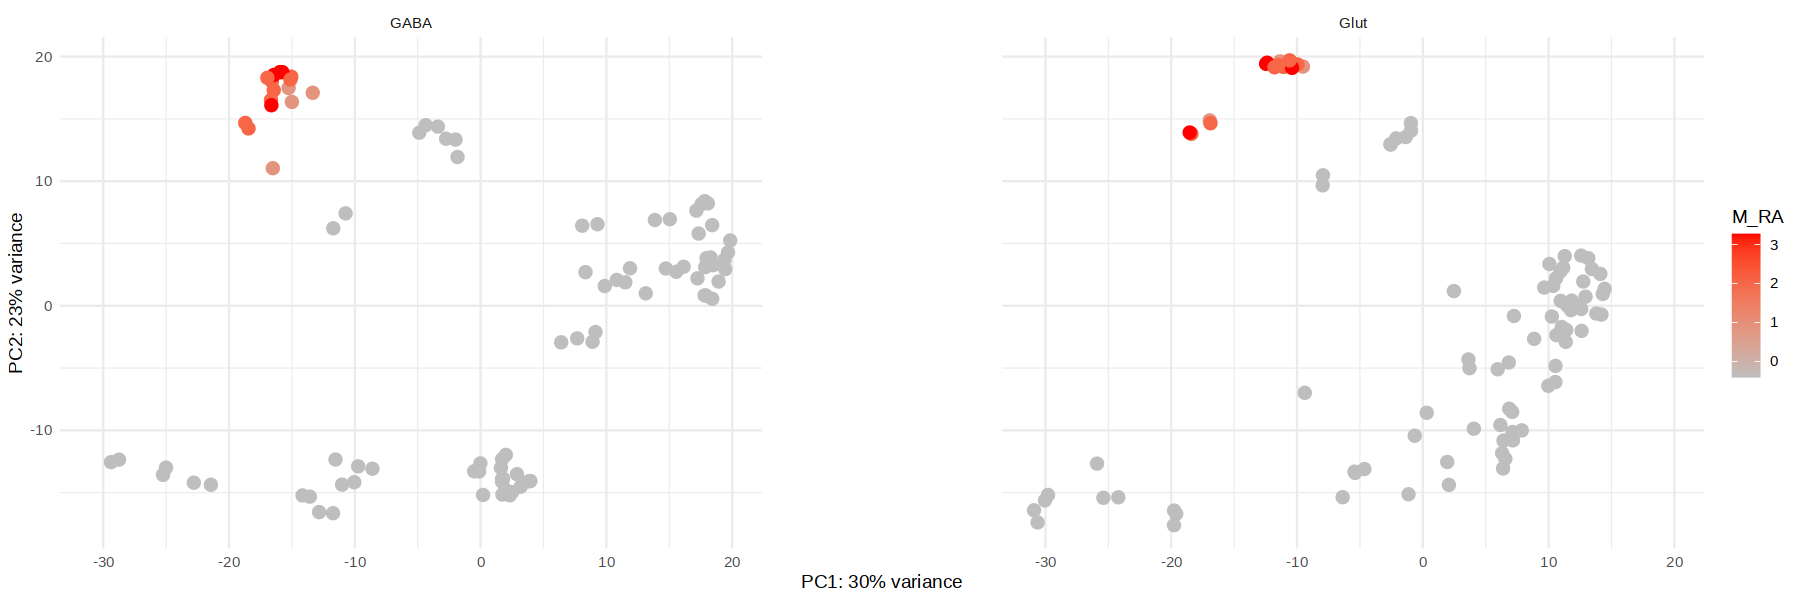

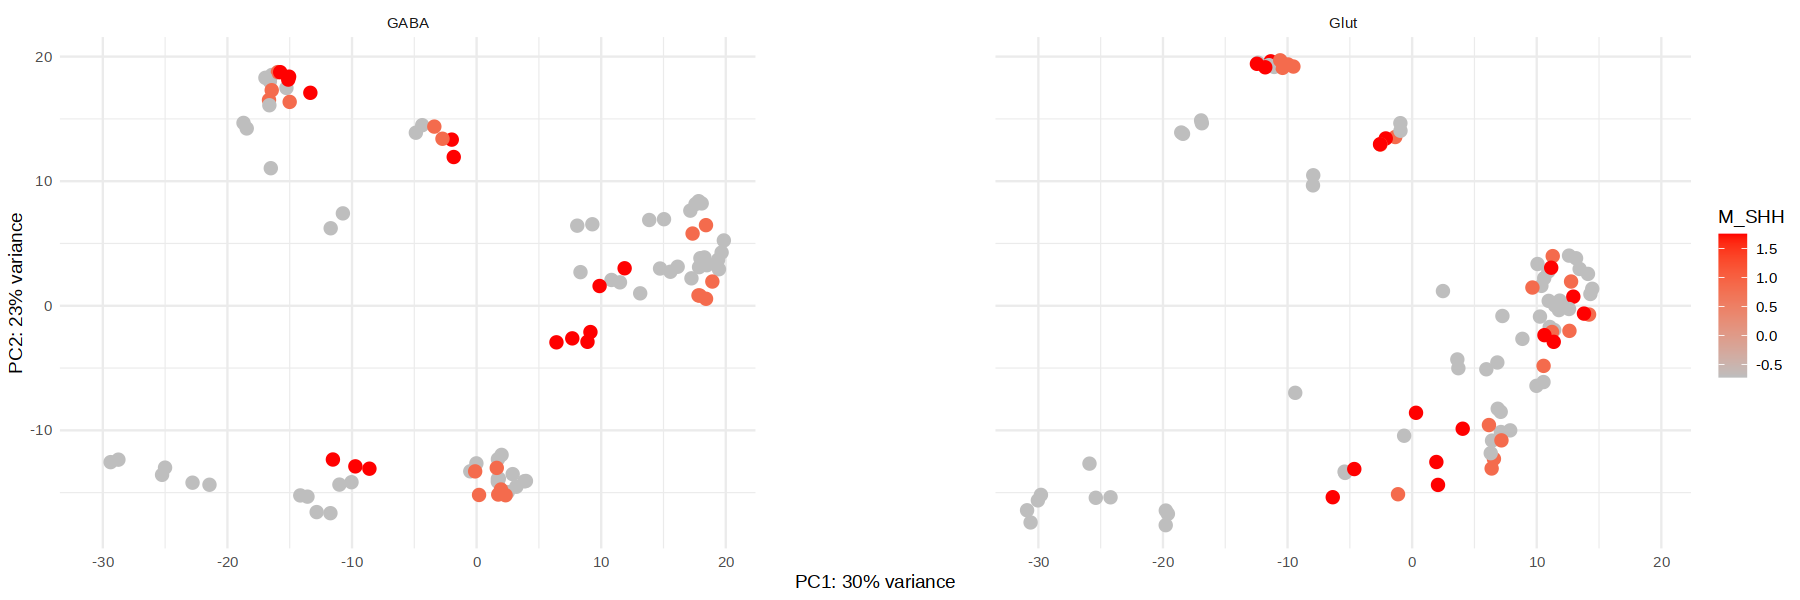

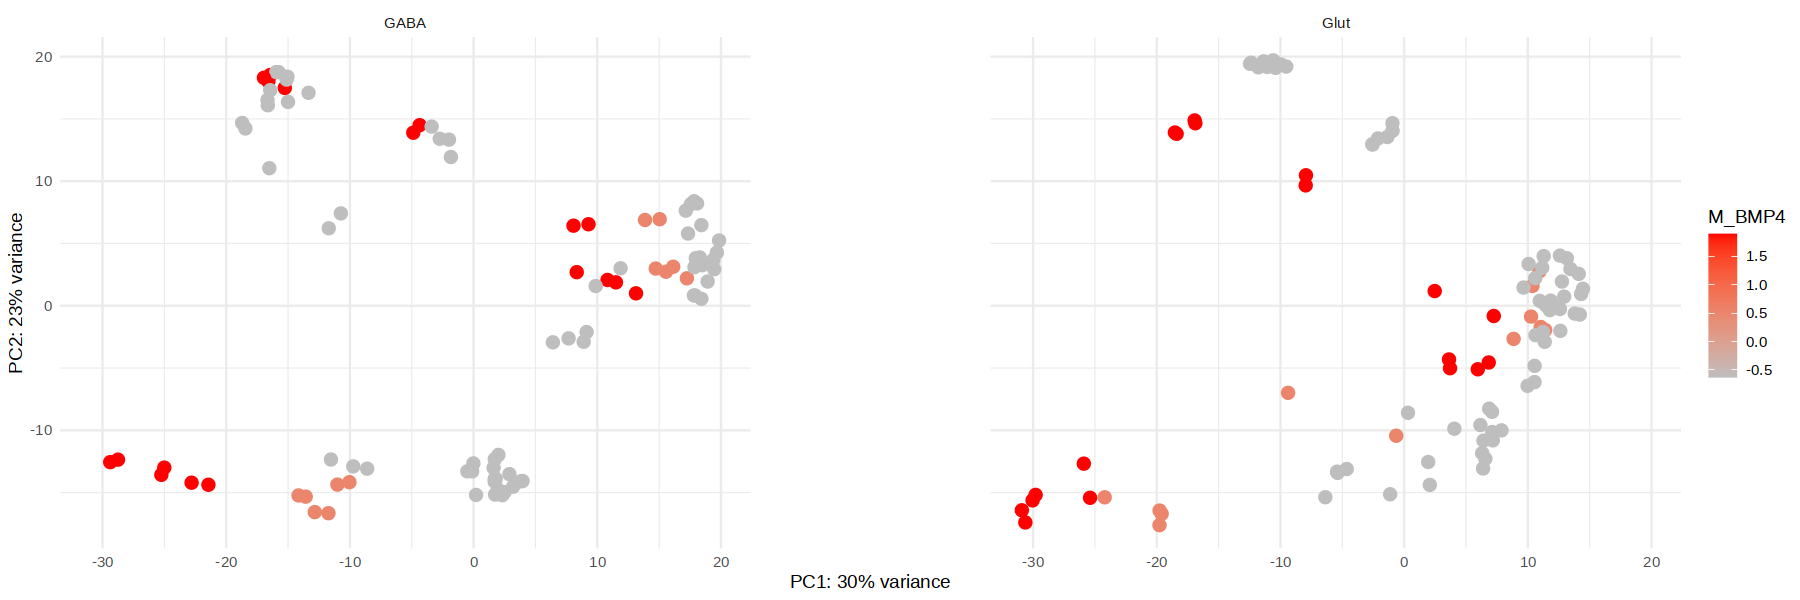

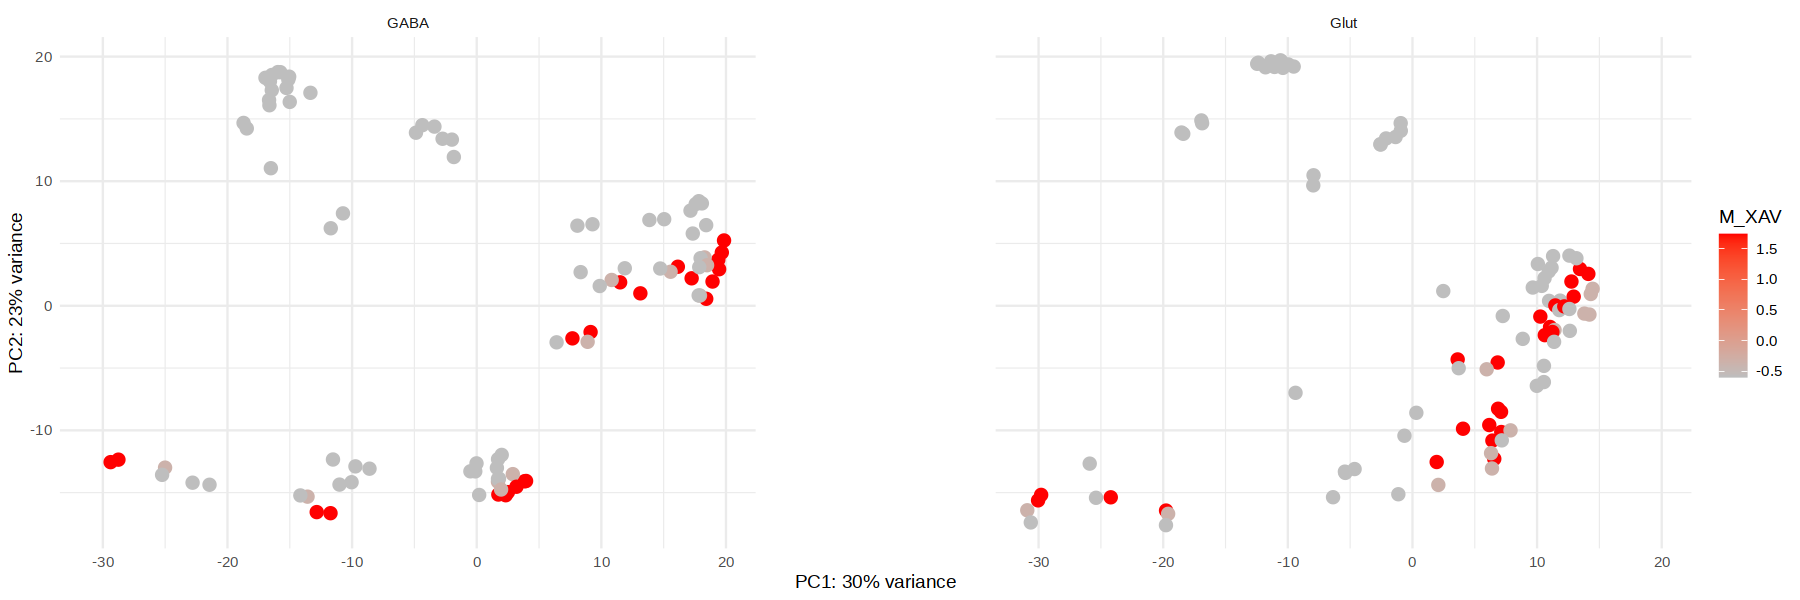

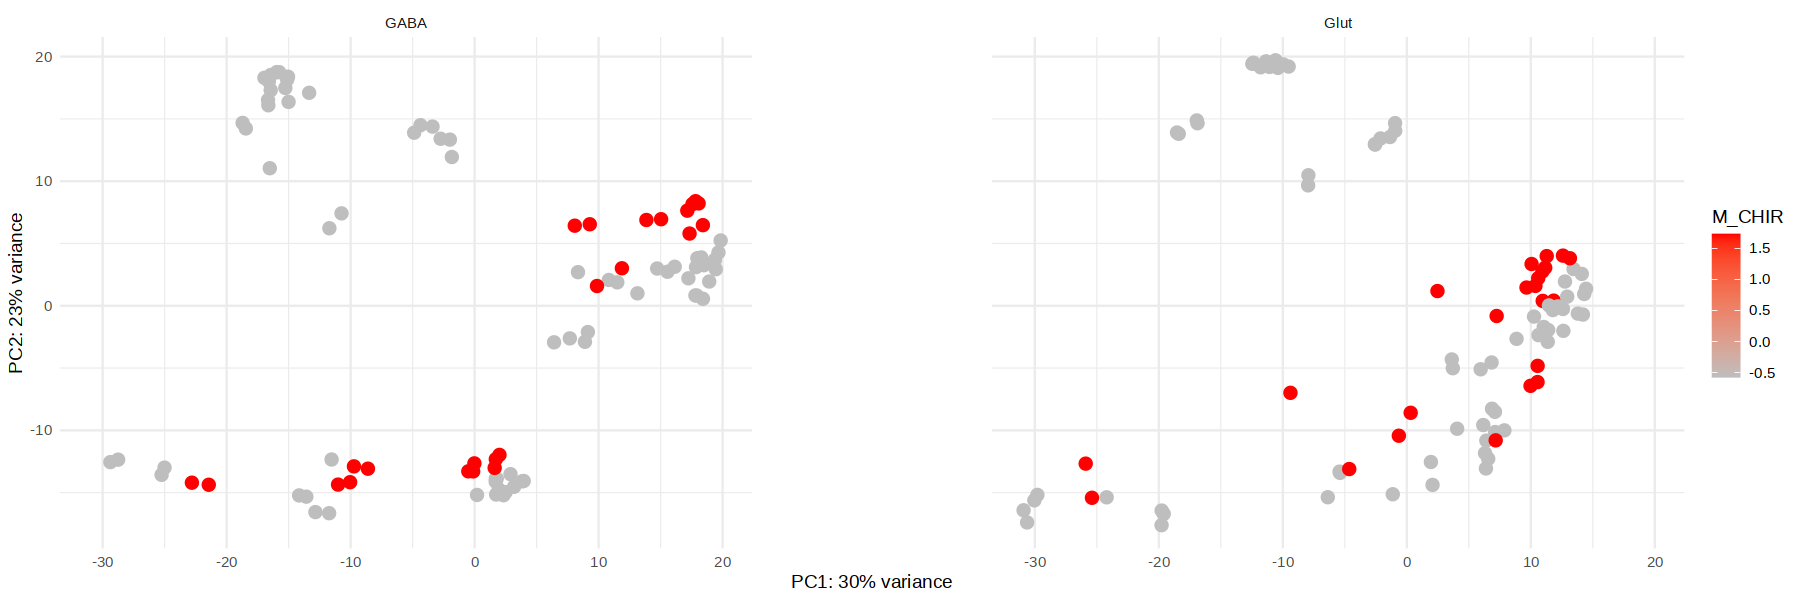

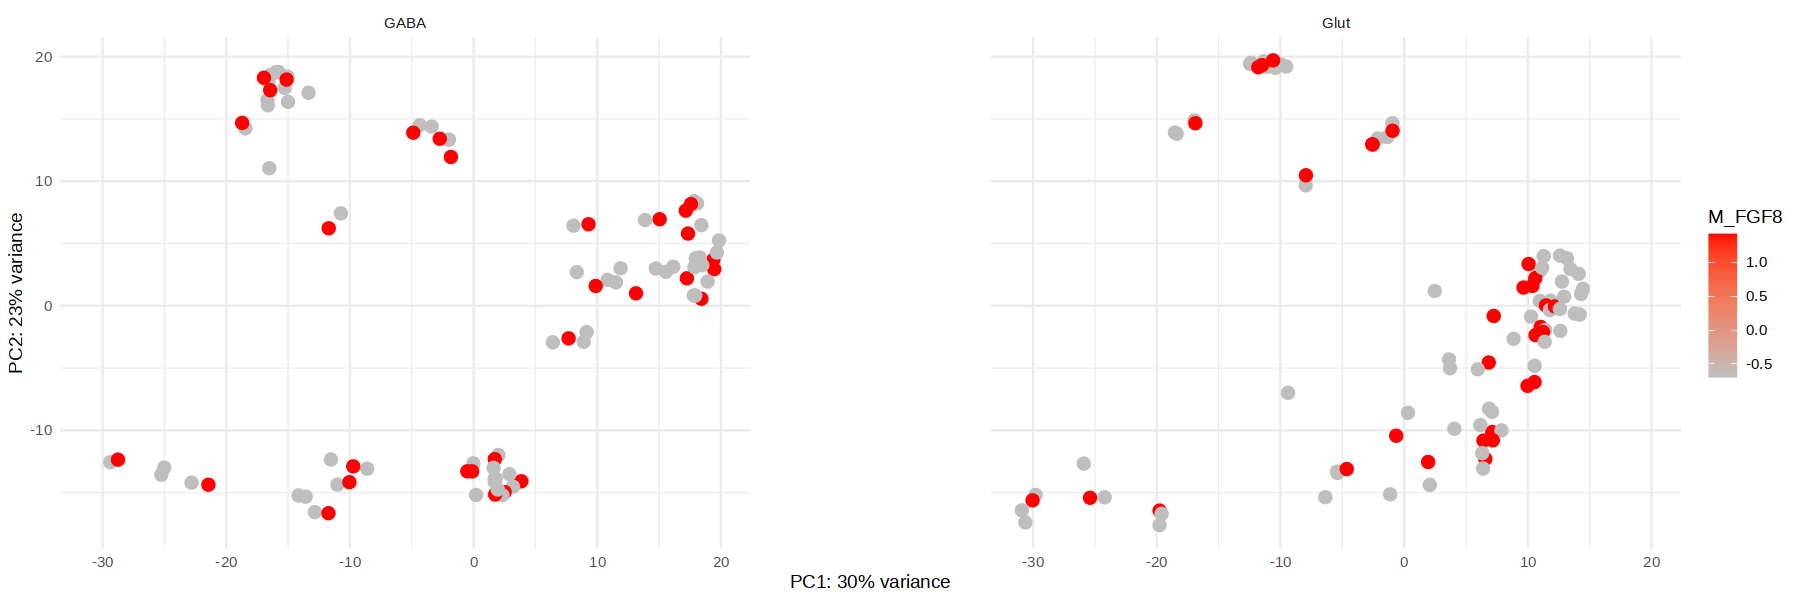

In [48]:
library(ggplot2)
library(ggrepel)

# Example genes of interest
l1 <- genes_of_interest <- c("M_RA","M_SHH","M_BMP4","M_XAV","M_CHIR","M_FGF8")
l2 <- c("condition", "TF")

# Extract PCA data
pcaData <- plotPCA(vsd, intgroup = append(l1, l2), returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))

# Loop through genes and create plots
for (gene in genes_of_interest) {  
  # Create PCA plot for the current gene
  gene_plot <- ggplot(pcaData, aes_string(x = "PC1", y = "PC2", color = gene)) +
    geom_point(size = 3) +
    xlab(paste0("PC1: ", percentVar[1], "% variance")) +
    ylab(paste0("PC2: ", percentVar[2], "% variance")) +
    scale_color_gradient(low = "grey", high = "red") +
    theme_minimal() +
    facet_wrap(~ TF) +
    theme(panel.spacing = unit(10, "lines"))  # Adjust facet spacing as needed
  
  # Print the plot
  print(gene_plot)
}


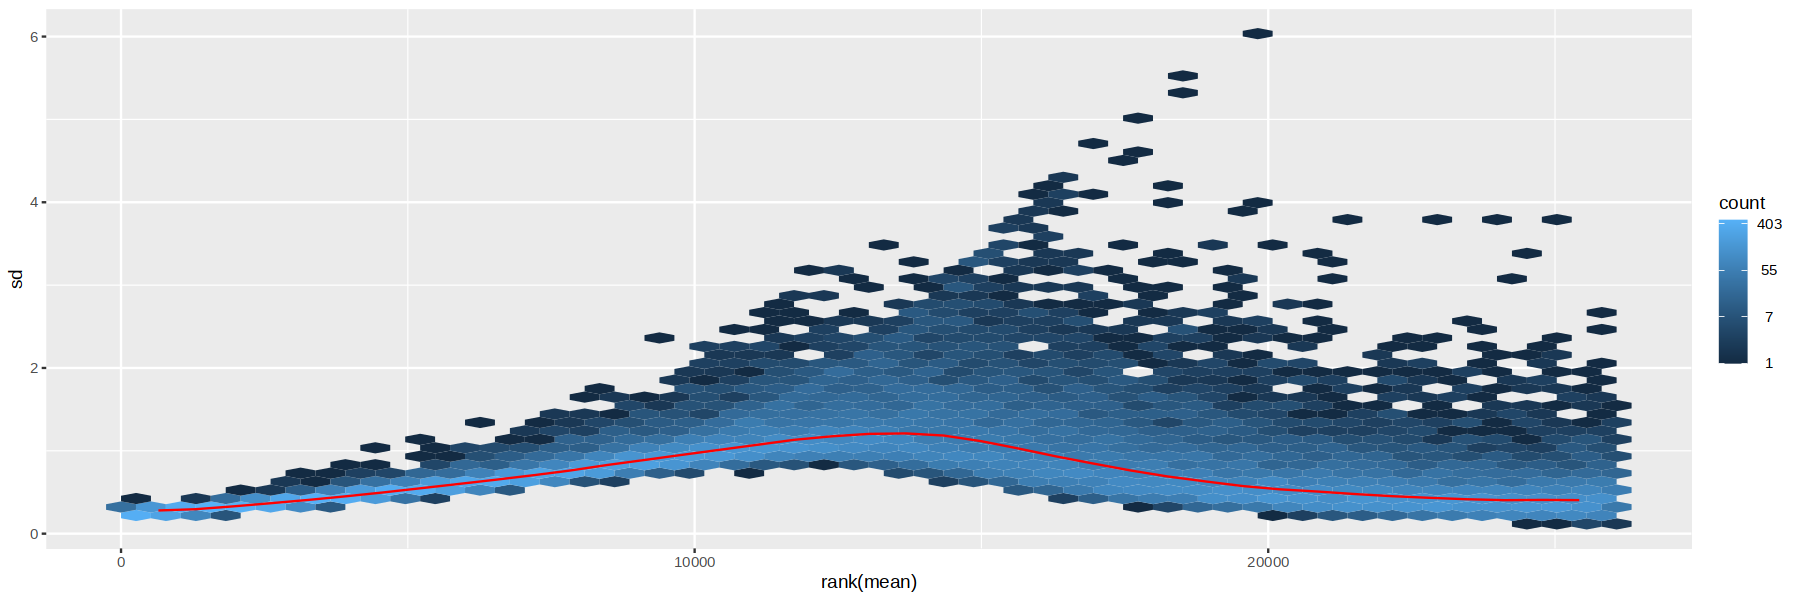

In [49]:
# this gives log2(n + 1)
ntd <- normTransform(dds)
library("vsn")
meanSdPlot(assay(ntd)) 

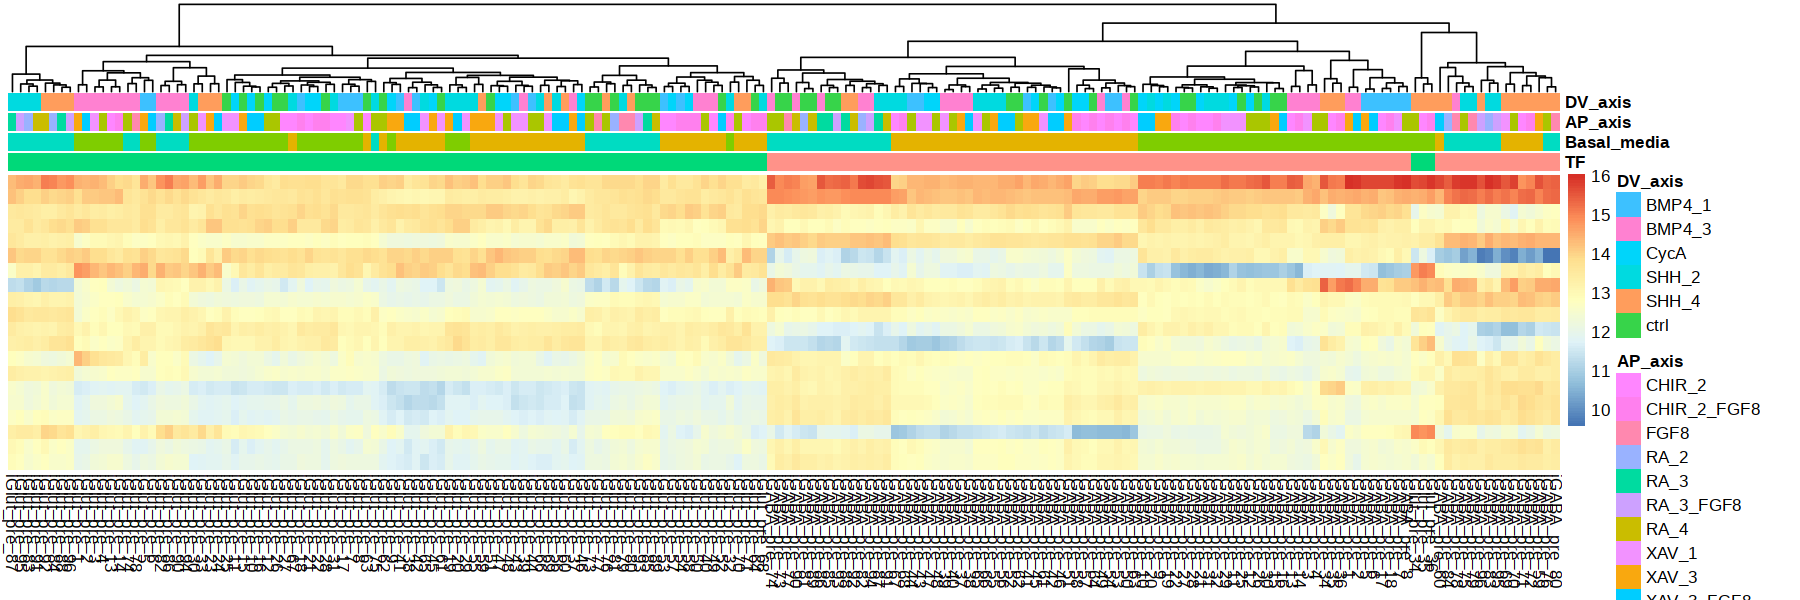

In [50]:
library("pheatmap")
select <- order(rowMeans(counts(dds,normalized=TRUE)),
                decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dds)[,c("TF","Basal_media","AP_axis","DV_axis")])
pheatmap(assay(ntd)[select,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=TRUE, annotation_col=df)

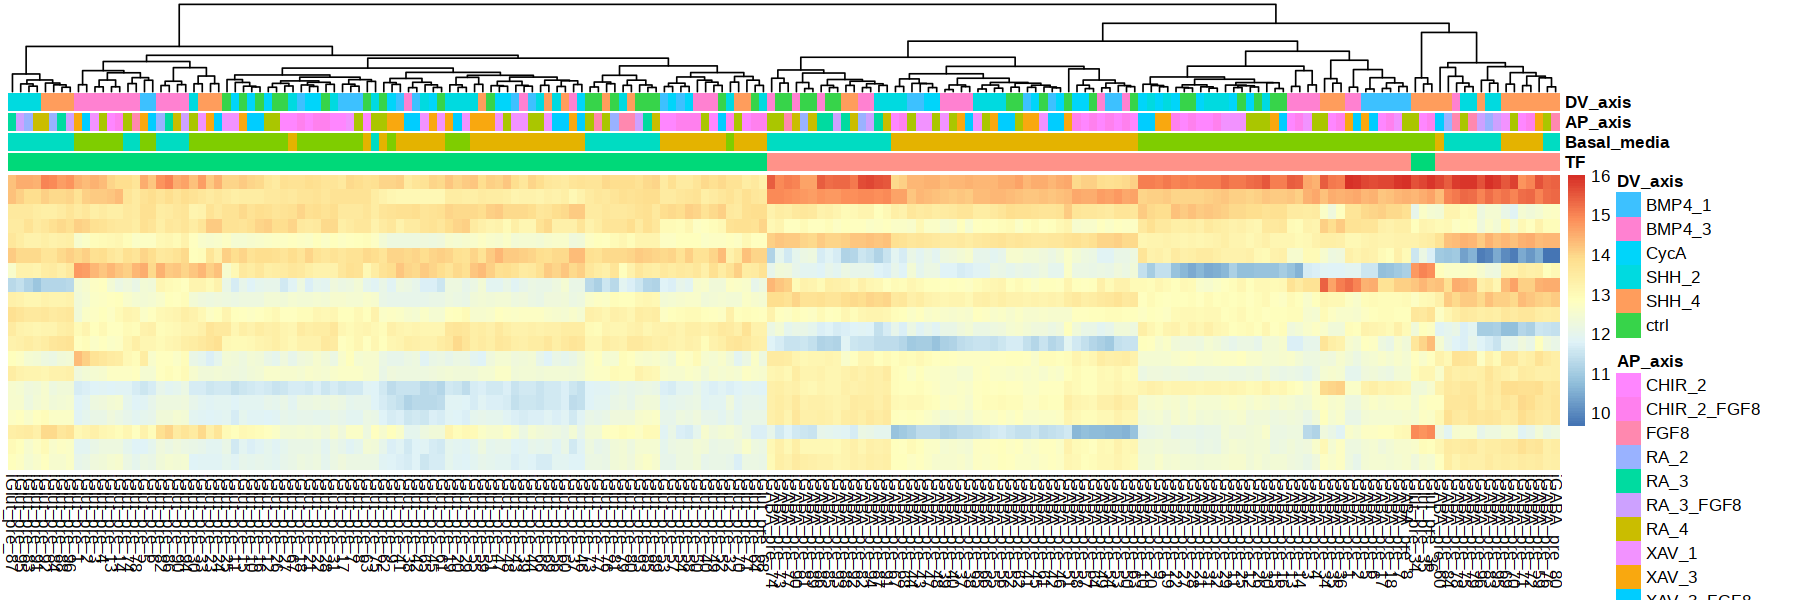

In [52]:
library("pheatmap")
select <- order(rowMeans(counts(dds,normalized=TRUE)),
                decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dds)[,c("TF","Basal_media","AP_axis","DV_axis")])
pheatmap(assay(vsd_orig)[select,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=TRUE, annotation_col=df)

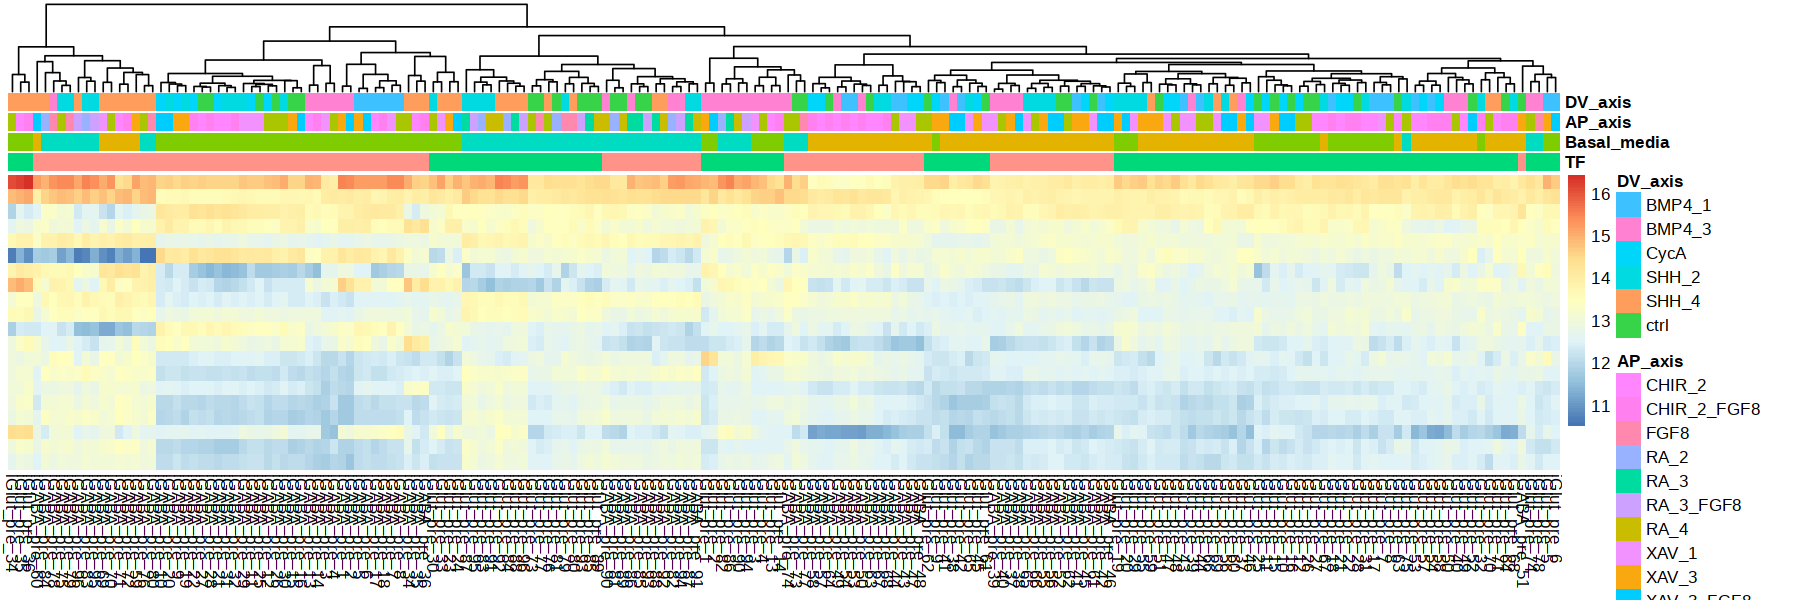

In [54]:
library("pheatmap")
select <- order(rowMeans(counts(dds,normalized=TRUE)),
                decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dds)[,c("TF","Basal_media","AP_axis","DV_axis")])
pheatmap(assay(vsd)[select,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=TRUE, annotation_col=df)

In [133]:
# Define the color dictionary
TF_colors <- list(    
    'Glut' = 'blue',
    'GABA' = 'red')

BM_colors <- list(  
    'N2B27_SB_CHIR' = '#102A4D',
    'N2B27_2Si' = '#8DC7DD',
    'NIM' = '#4E835E',
    'mTeSR' = '#CBCCCC' 
)

#used AP colors:      CHIR_2 CHIR_2_FGF8        FGF8        RA_2        RA_3   RA_3_FGF8 
#       RA_4       XAV_1       XAV_3  XAV_3_FGF8        ctrl 
AP_colors <- list(
  'RA_4' = "#376795",
  'RA_3' = "#528fad",
  'RA_2' = "#72bcd5",
#  'RA_1' = "#aadce0",
    
  'XAV_3' = "#9a133d",
#  'XAV_2' = "#d8527c",
  'XAV_1' = "#f9b4c9",
  
#  'FGF8_1' = '#ffbbff',
#  'FGF8_2' = '#ee7ae9',
#  'FGF8_3' = '#b452cd',
#  'FGF8_4' = '#8b008b',
  'FGF8' = '#8b008b',
    
#  'CHIR_1' = "#dec5da",
  'CHIR_2' = "#b695bc",
#  'CHIR_3' = "#90719f",
#  'CHIR_4' = "#574571",

#  'RA_4_CHIR' = "#3c7c3d",
  'RA_3_CHIR' = "#669d62",
#  'RA_2_CHIR' = "#9cc184",
#  'RA_1_CHIR' = "#c2d6a4",
  
#  'FGF8_1_CHIR' = "#cccccc",
#  'FGF8_2_CHIR' = "#999999",
#  'FGF8_3_CHIR' = "#666666",
#  'FGF8_4_CHIR' = "#333333",

  'XAV_3_FGF8' = "#D8527C",
  'RA_3_FGF8' = "#183E6B",
  'CHIR_2_FGF8' = "#90719F",
  'ctrl' = '#FFFFFF'
)


#used DV options: BMP4_1 BMP4_3   CycA  SHH_2  SHH_4   ctrl 
DV_colors <- list(
  'BMP4_3' = "#ffb242",
# 'BMP4_2' = "#ffd353",
  'BMP4_1' = "#ffe6b7",
# 'SHH_1' = "#C2D9F7",
  'SHH_2' = "#98C1F0",
# 'SHH_3' = "#4782DD",
  'SHH_4' = "#1D52A1",
  'CycA' = '#659E62',
  'ctrl' = '#FFFFFF'
)

# Map annotation colors to the relevant variables
annotation_colors <- list(
  TF = TF_colors,  # Assuming 'TF' annotations match keys in the color_dict
  Basal_media = BM_colors,
  AP_axis = AP_colors,
  DV_axis = DV_colors
)


Warning message in `[<-.data.frame`(`*tmp*`, , i, value = list(Glut = "blue", Glut = "blue", :
"provided 188 variables to replace 1 variables"
Warning message in grid.Call.graphics(C_rect, x$x, x$y, x$width, x$height, resolveHJust(x$just, :
"supplied color is neither numeric nor character"
Warning message in grid.Call.graphics(C_rect, x$x, x$y, x$width, x$height, resolveHJust(x$just, :
"supplied color is neither numeric nor character"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"supplied color is neither numeric nor character"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"supplied color is neither numeric nor character"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"supplied color is neither numeric nor character"
Warning message in grid.Call.graphics(C_rect, x$x, x$y, x$width, x$height, resolveHJust(x$just, :
"supplied color is neither numeric nor character"
Warning message i

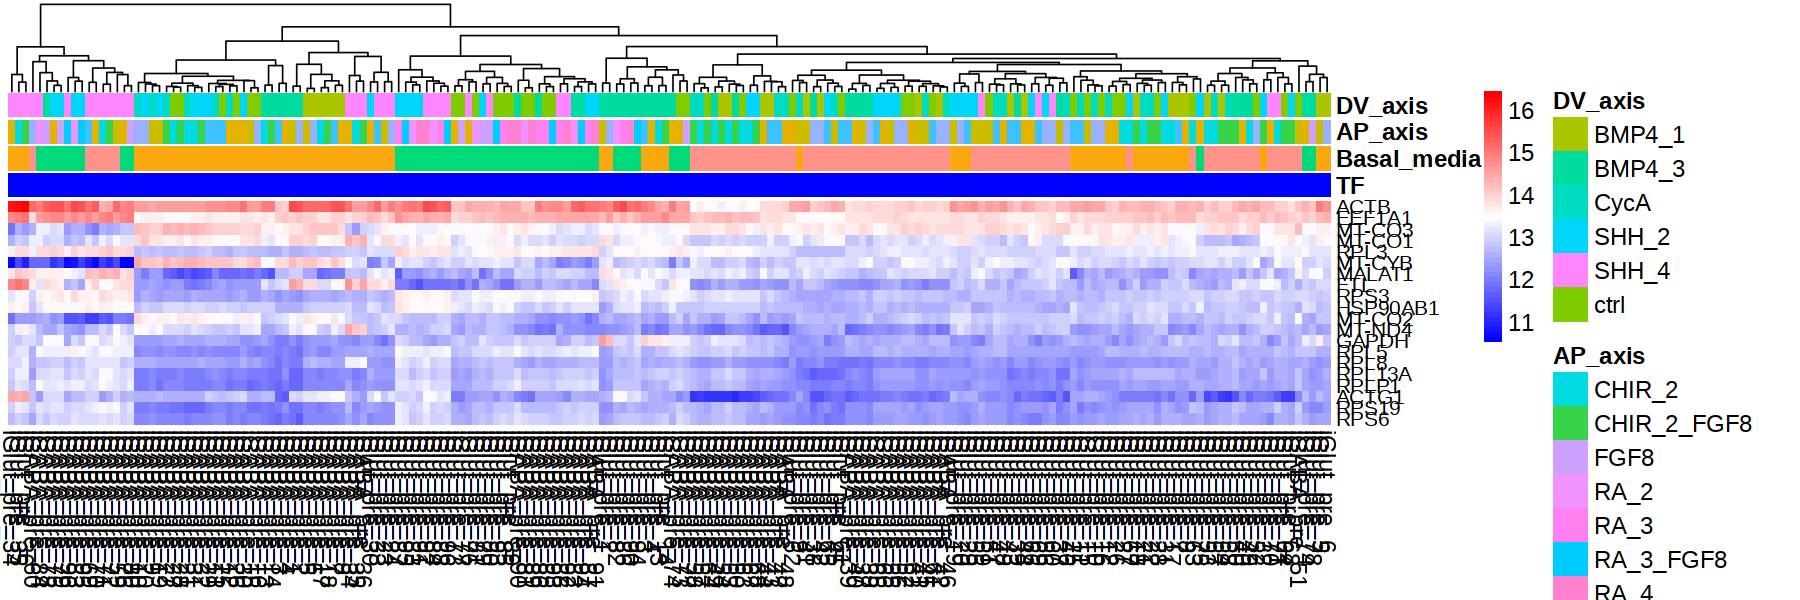

In [76]:
annotation_colors <- list(
  TF = TF_colors)

# Generate and save the heatmap with annotation colors
pheatmap(assay(vsd)[select, ],
         cluster_rows = FALSE,              # Do not cluster rows
         show_rownames = TRUE,              # Display row names (gene names)
         cluster_cols = TRUE,               # Cluster columns
         annotation_col = df,               # Add annotations
         annotation_colors = annotation_colors,  # Add annotation colors
         fontsize = 14,                     # Increase the general font size
         fontsize_row = 12,                 # Increase row name font size
         fontsize_col = 14,                 # Increase column name font size
         annotation_legend = TRUE,          # Show legend for annotations
         annotation_names_col = TRUE,       # Show names of annotation columns
         legend = TRUE,                     # Show color legend for heatmap
         color = colorRampPalette(c("blue", "white", "red"))(50),  # Custom color scale
         border_color = NA                  # Remove grid borders for a cleaner look
)


In [69]:
# Example correction: Ensure all annotations are valid
if (!all(sapply(annotation_colors, function(x) all(is.character(unlist(x)))))) {
  stop("Some colors in annotation_colors are not valid character or hex codes.")
}

In [135]:
TF_colors <- c(    
    Glut = 'blue',
    GABA = 'red')

BM_colors <- c(  
    N2B27_SB_CHIR = '#102A4D',
    N2B27_2Si = '#8DC7DD',
    NIM = '#4E835E',
    mTeSR = '#CBCCCC' 
)

AP_colors <- c(
  'RA_4' = "#376795",
  'RA_3' = "#528fad",
  'RA_2' = "#72bcd5",
  'XAV_3' = "#9a133d",
  'XAV_1' = "#f9b4c9",
  'FGF8' = '#8b008b',
  'CHIR_2' = "#b695bc",
  'RA_3_CHIR' = "#669d62",
  'XAV_3_FGF8' = "#D8527C",
  'RA_3_FGF8' = "#183E6B",
  'CHIR_2_FGF8' = "#90719F",
  'ctrl' = '#FFFFFF'
)

#used DV options: BMP4_1 BMP4_3   CycA  SHH_2  SHH_4   ctrl 
DV_colors <- c(
  'BMP4_3' = "#ffb242",
  'BMP4_1' = "#ffe6b7",
  'SHH_2' = "#98C1F0",
  'SHH_4' = "#1D52A1",
  'CycA' = '#659E62',
  'ctrl' = '#FFFFFF'
)

In [136]:
annotation_colors <- list(
  TF = TF_colors,  # Assuming 'TF' annotations match keys in the color_dict
  Basal_media = BM_colors,
  AP_axis = AP_colors,
  DV_axis = DV_colors
)


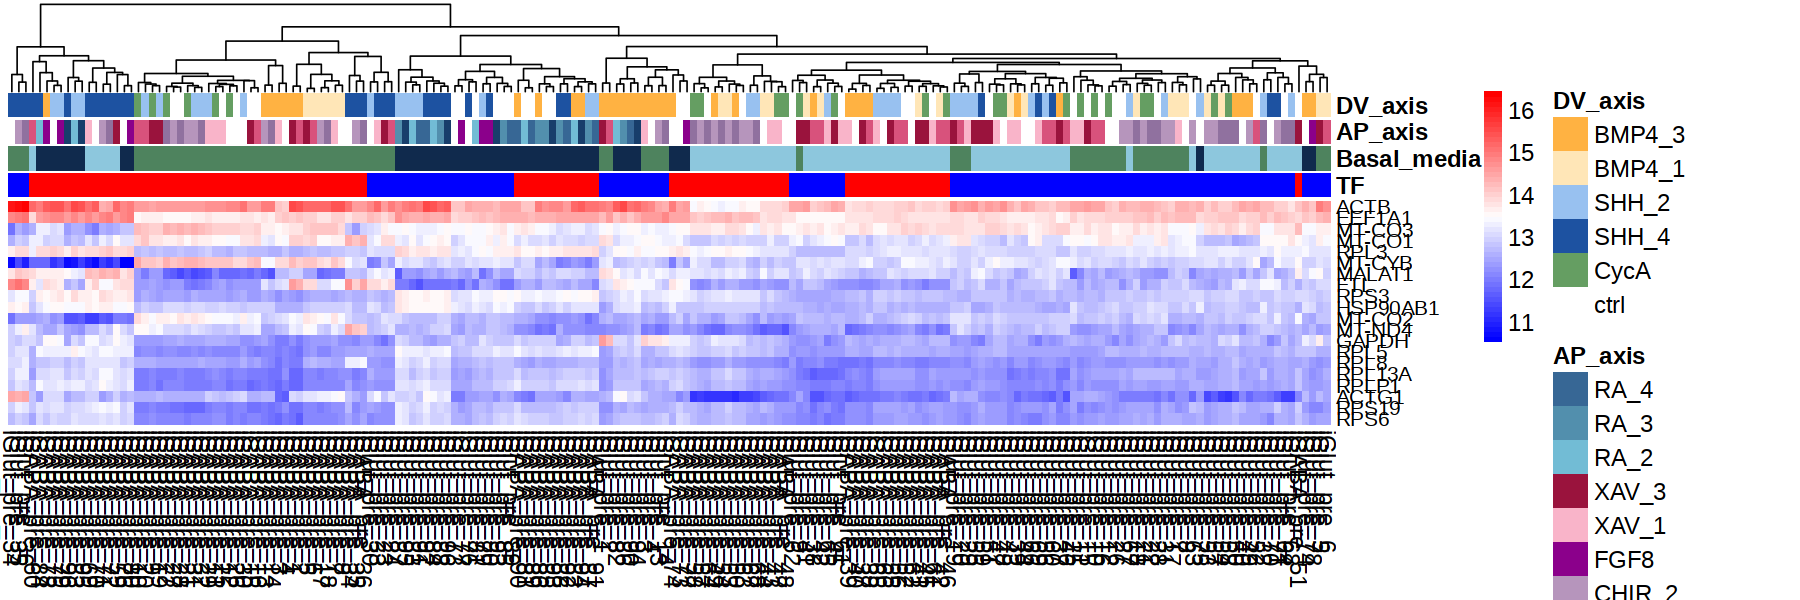

In [105]:
pheatmap(assay(vsd)[select, ],
         cluster_rows = FALSE,
         show_rownames = TRUE,
         cluster_cols = TRUE,
         annotation_col = df,
         annotation_colors = annotation_colors,
         fontsize = 14,
         fontsize_row = 12,
         fontsize_col = 14,
         annotation_legend = TRUE,
         annotation_names_col = TRUE,
         legend = TRUE,
         color = colorRampPalette(c("blue", "white", "red"))(50),
         border_color = NA
)

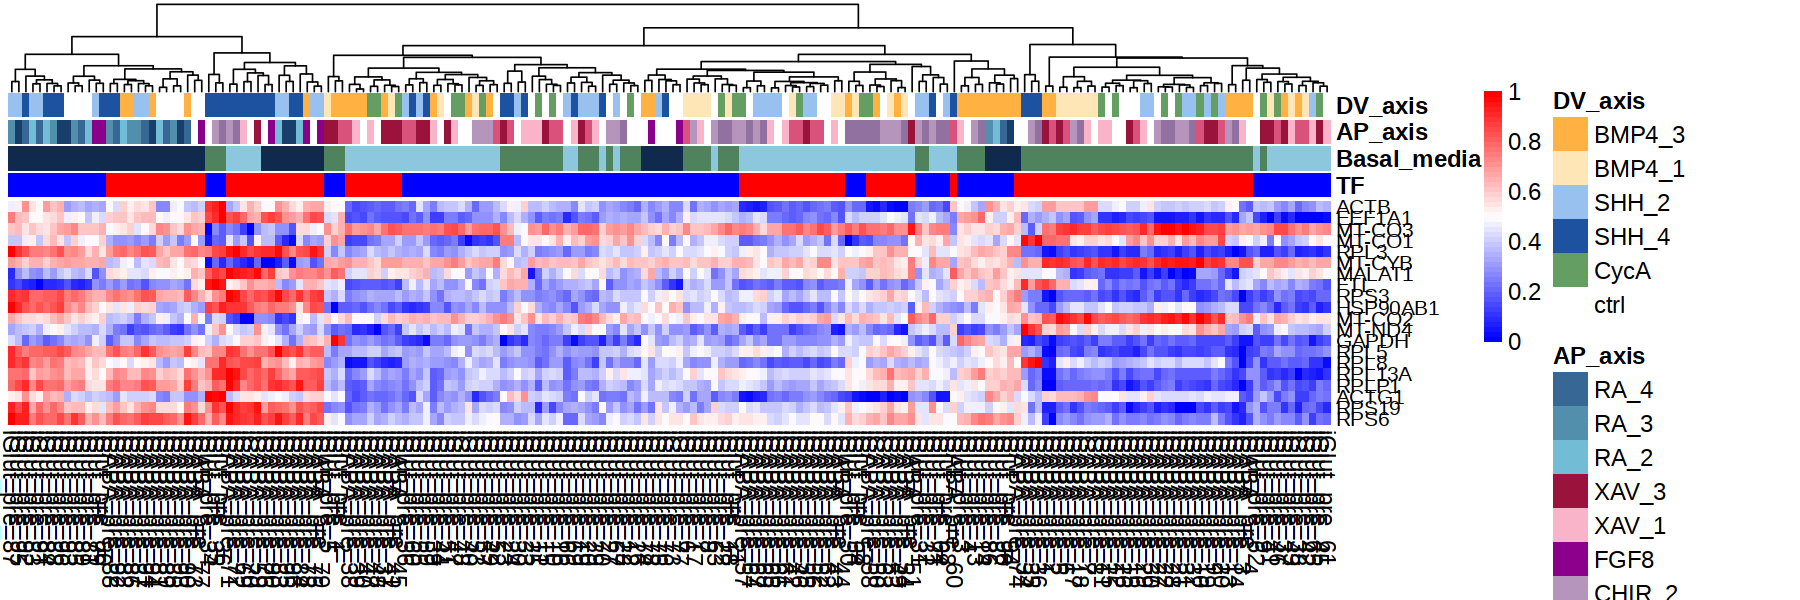

In [107]:
library(pheatmap)

# Select top 20 genes based on mean normalized counts
select <- order(rowMeans(counts(dds, normalized = TRUE)), decreasing = TRUE)[1:20]

# Extract the selected rows from the normalized counts
expression_data <- assay(vsd)[select, ]

# Min-max normalize the data by rows (genes)
normalize_minmax <- function(x) {
  return((x - min(x)) / (max(x) - min(x)))
}

# Apply min-max normalization to each row (gene)
normalized_data <- t(apply(expression_data, 1, normalize_minmax))

# Create a data frame for column annotations
df <- as.data.frame(colData(dds)[, c("TF", "Basal_media", "AP_axis", "DV_axis")])

# Define annotation colors as before
annotation_colors <- list(
  TF = TF_colors,  
  Basal_media = BM_colors,
  AP_axis = AP_colors,
  DV_axis = DV_colors
)

# Open a PDF device for saving the heatmap
#pdf("prepat_plots/Normalized_Heatmap_Publication.pdf", width = 10, height = 8)

# Generate and save the normalized heatmap
pheatmap(normalized_data,
         cluster_rows = FALSE,              # Do not cluster rows
         show_rownames = TRUE,              # Display row names (gene names)
         cluster_cols = TRUE,               # Cluster columns
         annotation_col = df,               # Add annotations
         annotation_colors = annotation_colors,  # Add annotation colors
         fontsize = 14,                     # Increase the general font size
         fontsize_row = 12,                 # Increase row name font size
         fontsize_col = 14,                 # Increase column name font size
         annotation_legend = TRUE,          # Show legend for annotations
         annotation_names_col = TRUE,       # Show names of annotation columns
         legend = TRUE,                     # Show color legend for heatmap
         color = colorRampPalette(c("blue", "white", "red"))(50),  # Custom color scale
         border_color = NA,                 # Remove grid borders for a cleaner look
         breaks = seq(0, 1, length.out = 51)  # Set vmin (0) and vmax (1) for normalized data
)

# Close the PDF device
#dev.off()


In [124]:
vsd_orig

class: DESeqTransform 
dim: 26075 188 
metadata(1): version
assays(1): ''
rownames(26075): A1BG A1BG-AS1 ... ZZEF1 ZZZ3
rowData names(54): baseMean baseVar ... maxCooks dispFit
colnames(188): iGlut_pre_1 iGlut_pre_2 ... iGABA_pre_95 iGABA_pre_96
colData names(20): Sample AP_axis ... sums sizeFactor

In [123]:
vsd

class: DESeqTransform 
dim: 26075 188 
metadata(1): version
assays(1): ''
rownames(26075): A1BG A1BG-AS1 ... ZZEF1 ZZZ3
rowData names(54): baseMean baseVar ... maxCooks dispFit
colnames(188): iGlut_pre_1 iGlut_pre_2 ... iGABA_pre_95 iGABA_pre_96
colData names(20): Sample AP_axis ... sums sizeFactor

In [127]:
dds

class: DESeqDataSet 
dim: 26075 188 
metadata(1): version
assays(4): counts mu H cooks
rownames(26075): A1BG A1BG-AS1 ... ZZEF1 ZZZ3
rowData names(54): baseMean baseVar ... deviance maxCooks
colnames(188): iGlut_pre_1 iGlut_pre_2 ... iGABA_pre_95 iGABA_pre_96
colData names(20): Sample AP_axis ... sums sizeFactor

png 
  2

pdf 
  3

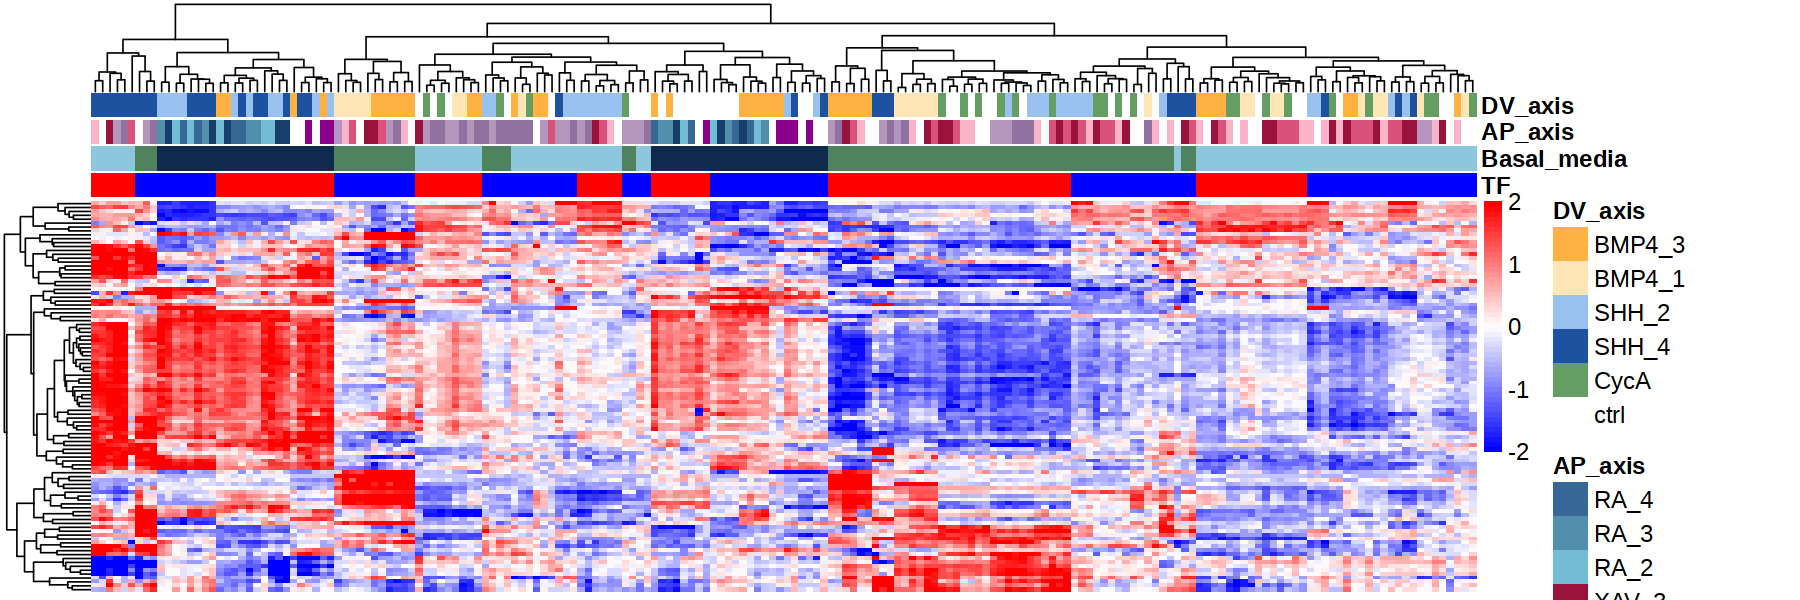

In [139]:
library(pheatmap)

# Select top 20 genes based on mean normalized counts
select <- order(rowVars(counts(dds, normalized = TRUE)), decreasing = TRUE)[1:100]

# Extract the selected rows from the normalized counts
expression_data <- assay(vsd)[select, ]

# Z-score normalization function
z_normalize <- function(x) {
  return((x - mean(x)) / sd(x))
}

# Apply z-normalization to each row (gene)
z_normalized_data <- t(apply(expression_data, 1, z_normalize))

# Cap the z-scores at -2 and 2 to control extreme values (optional)
z_normalized_data[z_normalized_data > 2] <- 2
z_normalized_data[z_normalized_data < -2] <- -2

# Create a data frame for column annotations
df <- as.data.frame(colData(dds)[, c("TF", "Basal_media", "AP_axis", "DV_axis")])

# Define annotation colors (as in the previous code)
annotation_colors <- list(
  TF = TF_colors,  
  Basal_media = BM_colors,
  AP_axis = AP_colors,
  DV_axis = DV_colors
)

# Open a PDF device for saving the heatmap
pdf("prepat_plots/Z_Normalized_Heatmap_Publication.pdf", width = 10, height = 8)

# Generate and save the z-normalized heatmap
my_heatmap <- pheatmap(z_normalized_data,
         cluster_rows = TRUE,              # Do not cluster rows
         show_rownames = FALSE,              # Display row names (gene names)
         show_colnames = FALSE,             # Display column names (gene names)
         cluster_cols = TRUE,               # Cluster columns
         annotation_col = df,               # Add annotations
         annotation_colors = annotation_colors,  # Add annotation colors
         fontsize = 14,                     # Increase the general font size
         fontsize_row = 12,                 # Increase row name font size
         fontsize_col = 14,                 # Increase column name font size
         annotation_legend = TRUE,          # Show legend for annotations
         annotation_names_col = TRUE,       # Show names of annotation columns
         legend = TRUE,                     # Show color legend for heatmap
         color = colorRampPalette(c("blue", "white", "red"))(50),  # Custom color scale
         border_color = NA,                 # Remove grid borders for a cleaner look
         breaks = seq(-2, 2, length.out = 51)  # Set vmin (-2) and vmax (2) for z-normalized data
)
save_pheatmap_png <- function(x, filename, width=5000, height=3000, res = 350) {
  png(filename, width = width, height = height, res = res)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}
 
save_pheatmap_png(my_heatmap, "prepat_plots/Z_Normalized_Heatmap_Publication.png")

# Ensure the plot is rendered before closing the device
dev.off()


png 
  2

pdf 
  3

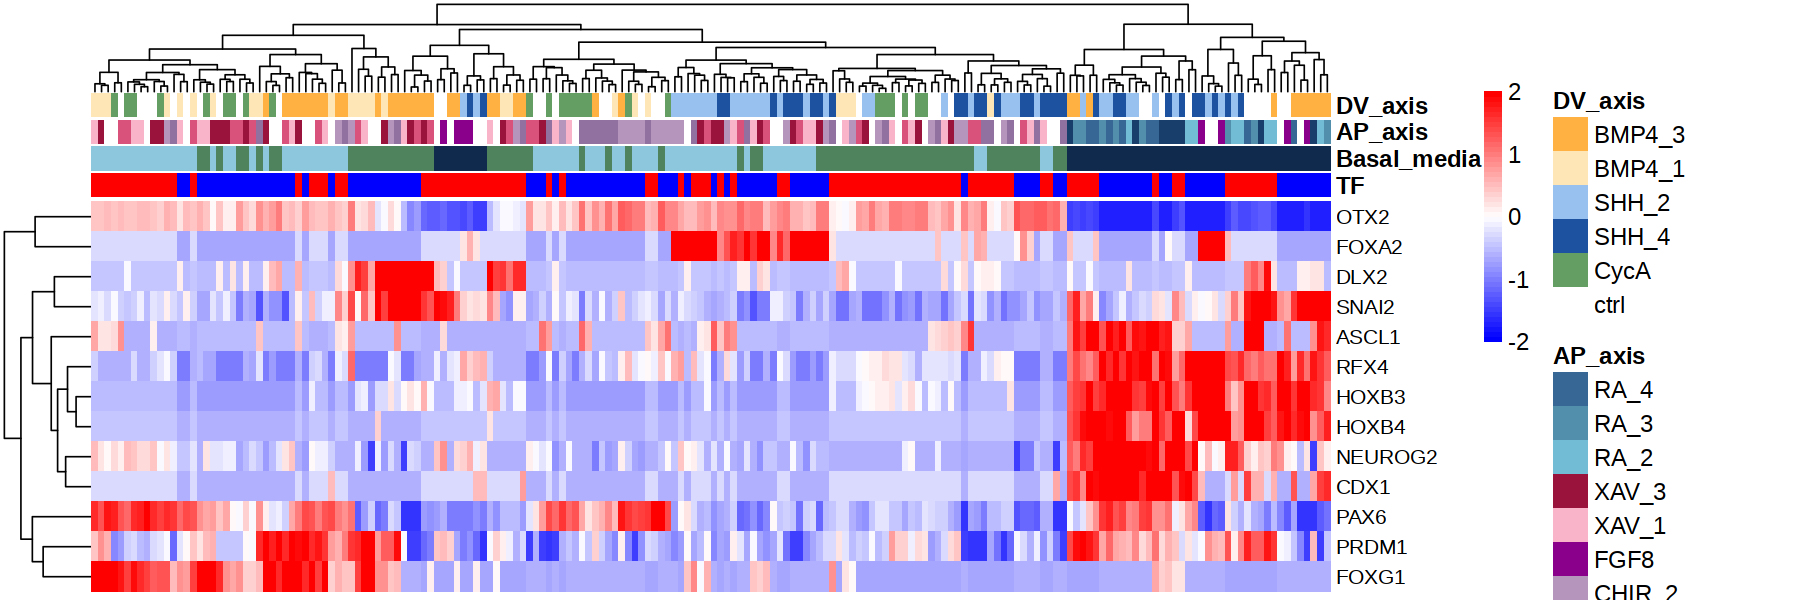

In [140]:
library(pheatmap)

# Select top 20 genes based on mean normalized counts
select <- c("ASCL1","DLX2","NEUROG2","PAX6", "OTX2","CDX1","PRDM1",'HOXB3','HOXB4','FOXA2','RFX4','FOXG1','SNAI2')


# Extract the selected rows from the normalized counts
expression_data <- assay(vsd)[select, ]

# Z-score normalization function
z_normalize <- function(x) {
  return((x - mean(x)) / sd(x))
}

# Apply z-normalization to each row (gene)
z_normalized_data <- t(apply(expression_data, 1, z_normalize))

# Cap the z-scores at -2 and 2 to control extreme values (optional)
z_normalized_data[z_normalized_data > 2] <- 2
z_normalized_data[z_normalized_data < -2] <- -2

# Create a data frame for column annotations
df <- as.data.frame(colData(dds)[, c("TF", "Basal_media", "AP_axis", "DV_axis")])

# Define annotation colors (as in the previous code)
annotation_colors <- list(
  TF = TF_colors,  
  Basal_media = BM_colors,
  AP_axis = AP_colors,
  DV_axis = DV_colors
)

# Open a PDF device for saving the heatmap
pdf("prepat_plots/Z_Normalized_Heatmap_Publication_selectgenes.pdf", width = 10, height = 8)

# Generate and save the z-normalized heatmap
my_heatmap <- pheatmap(z_normalized_data,
         cluster_rows = TRUE,              # Do not cluster rows
         show_rownames = TRUE,              # Display row names (gene names)
         show_colnames = FALSE,             # Display column names (gene names)
         cluster_cols = TRUE,               # Cluster columns
         annotation_col = df,               # Add annotations
         annotation_colors = annotation_colors,  # Add annotation colors
         fontsize = 14,                     # Increase the general font size
         fontsize_row = 12,                 # Increase row name font size
         fontsize_col = 14,                 # Increase column name font size
         annotation_legend = TRUE,          # Show legend for annotations
         annotation_names_col = TRUE,       # Show names of annotation columns
         legend = TRUE,                     # Show color legend for heatmap
         color = colorRampPalette(c("blue", "white", "red"))(50),  # Custom color scale
         border_color = NA,                 # Remove grid borders for a cleaner look
         breaks = seq(-2, 2, length.out = 51)  # Set vmin (-2) and vmax (2) for z-normalized data
)
save_pheatmap_png <- function(x, filename, width=5000, height=3000, res = 350) {
  png(filename, width = width, height = height, res = res)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}
 
save_pheatmap_png(my_heatmap, "prepat_plots/Z_Normalized_Heatmap_Publication_selectgenes.png")

# Ensure the plot is rendered before closing the device
dev.off()
